## Capstone Project Submission

- Name: Vivienne DiFrancesco
- Instructor: James Irving
- Pace: Full Time


# Introducion


# Obtain

In [1]:
import numpy as np
np.random.seed(123)

C:\Users\drudi\Anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\drudi\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\drudi\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import tensorflow as tf
tf.random.set_seed(123)

In [3]:
import pandas as pd
import scipy
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Setting pandas to display max columns and rows
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Setting inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Target

In [5]:
def glob_concat(path, file_str):
    '''
    Looks for files in folder path and combines them into a DataFrame.
    
    Args:
        path (str): Location on computer where files are located.
        file_str (str): Specific search query of which files to find.
        
    Returns:
        Displays the files that were found for verification and returns the 
        DataFrame of all files after pd.concat is performed.
    
    Example:
        combined_df = glob_concat(r'File/File', '*.XPT')
    '''
    
    files = glob.glob(os.path.join(path, file_str))
    display(files)
    df_files = [pd.read_sas(file) for file in files]
    combined_df = pd.concat(df_files)
    return combined_df

In [6]:
path = r'Data/Target'
df_target = glob_concat(path, '*.XPT')

['Data/Target\\DPQ_D.XPT',
 'Data/Target\\DPQ_E.XPT',
 'Data/Target\\DPQ_F.XPT',
 'Data/Target\\DPQ_G.XPT',
 'Data/Target\\DPQ_H.XPT',
 'Data/Target\\DPQ_I.XPT',
 'Data/Target\\DPQ_J.XPT']

In [7]:
df_target.head(10)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,31130.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31131.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
2,31132.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
3,31134.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
4,31139.000,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000
5,31143.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000
6,31144.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
7,31149.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
8,31150.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,31151.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000


In [8]:
df_target.SEQN = df_target.SEQN.astype('int64')
df_target.set_index('SEQN', verify_integrity=True, inplace=True)

In [9]:
df_target.drop(columns=['DPQ100'], inplace=True)

In [10]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40496 entries, 31130 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36471 non-null  float64
 1   DPQ020  36465 non-null  float64
 2   DPQ030  36463 non-null  float64
 3   DPQ040  36458 non-null  float64
 4   DPQ050  36458 non-null  float64
 5   DPQ060  36455 non-null  float64
 6   DPQ070  36453 non-null  float64
 7   DPQ080  36452 non-null  float64
 8   DPQ090  36447 non-null  float64
dtypes: float64(9)
memory usage: 3.1 MB


In [11]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31130,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31134,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31139,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000


In [12]:
df_target.isna().sum()

DPQ010    4025
DPQ020    4031
DPQ030    4033
DPQ040    4038
DPQ050    4038
DPQ060    4041
DPQ070    4043
DPQ080    4044
DPQ090    4049
dtype: int64

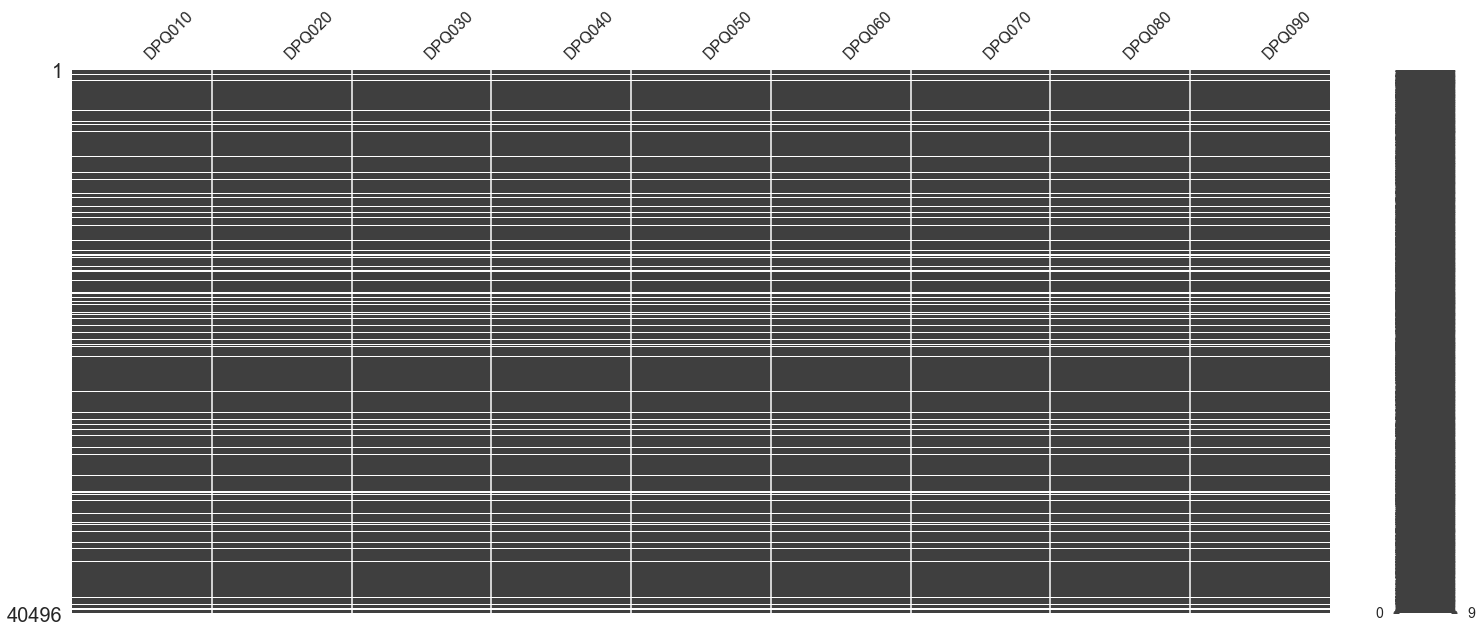

In [13]:
import missingno as ms
ms.matrix(df_target);

In [14]:
df_target.dropna(inplace=True)

In [15]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36447 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36447 non-null  float64
 1   DPQ020  36447 non-null  float64
 2   DPQ030  36447 non-null  float64
 3   DPQ040  36447 non-null  float64
 4   DPQ050  36447 non-null  float64
 5   DPQ060  36447 non-null  float64
 6   DPQ070  36447 non-null  float64
 7   DPQ080  36447 non-null  float64
 8   DPQ090  36447 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [16]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31134,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31139,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000
31143,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000


In [17]:
def val_counts(df):
    for col in df.columns:
        print(f'{col} value counts', '\n')
        display(df[col].value_counts(dropna=False))
        print('--------------------------------------')

In [18]:
val_counts(df_target)

DPQ010 value counts 



0.000    27333
1.000     5946
2.000     1716
3.000     1385
9.000       54
7.000       13
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    27582
1.000     6117
2.000     1471
3.000     1243
9.000       26
7.000        8
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    22611
1.000     8120
3.000     3180
2.000     2506
9.000       24
7.000        6
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    18316
1.000    12057
3.000     3108
2.000     2937
9.000       23
7.000        6
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    27482
1.000     5614
2.000     1696
3.000     1628
9.000       24
7.000        3
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    30214
1.000     4161
2.000     1032
3.000      989
9.000       45
7.000        6
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    30248
1.000     3967
3.000     1126
2.000     1075
9.000       27
7.000        4
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    32397
1.000     2574
2.000      770
3.000      661
9.000       41
7.000        4
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    35027
1.000      950
2.000      224
3.000      208
9.000       30
7.000        8
Name: DPQ090, dtype: int64

--------------------------------------


In [19]:
df_target = df_target[(df_target != 7) & (df_target != 9)]

In [20]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31134,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31139,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000
31143,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000


In [21]:
val_counts(df_target)

DPQ010 value counts 



0.000    27333
1.000     5946
2.000     1716
3.000     1385
nan         67
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    27582
1.000     6117
2.000     1471
3.000     1243
nan         34
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    22611
1.000     8120
3.000     3180
2.000     2506
nan         30
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    18316
1.000    12057
3.000     3108
2.000     2937
nan         29
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    27482
1.000     5614
2.000     1696
3.000     1628
nan         27
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    30214
1.000     4161
2.000     1032
3.000      989
nan         51
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    30248
1.000     3967
3.000     1126
2.000     1075
nan         31
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    32397
1.000     2574
2.000      770
3.000      661
nan         45
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    35027
1.000      950
2.000      224
3.000      208
nan         38
Name: DPQ090, dtype: int64

--------------------------------------


In [22]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36447 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36380 non-null  float64
 1   DPQ020  36413 non-null  float64
 2   DPQ030  36417 non-null  float64
 3   DPQ040  36418 non-null  float64
 4   DPQ050  36420 non-null  float64
 5   DPQ060  36396 non-null  float64
 6   DPQ070  36416 non-null  float64
 7   DPQ080  36402 non-null  float64
 8   DPQ090  36409 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [23]:
df_target.isna().sum()

DPQ010    67
DPQ020    34
DPQ030    30
DPQ040    29
DPQ050    27
DPQ060    51
DPQ070    31
DPQ080    45
DPQ090    38
dtype: int64

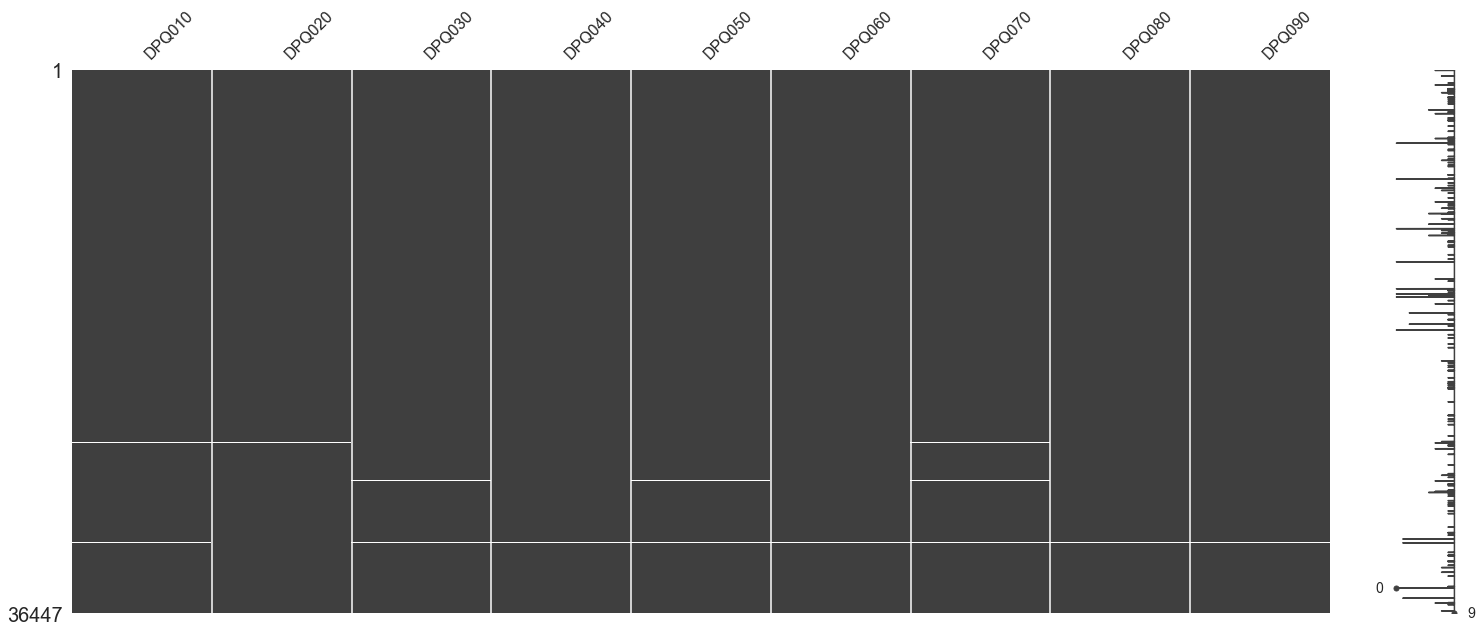

In [24]:
ms.matrix(df_target);

In [25]:
df_target.dropna(inplace=True)

In [26]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36259 non-null  float64
 1   DPQ020  36259 non-null  float64
 2   DPQ030  36259 non-null  float64
 3   DPQ040  36259 non-null  float64
 4   DPQ050  36259 non-null  float64
 5   DPQ060  36259 non-null  float64
 6   DPQ070  36259 non-null  float64
 7   DPQ080  36259 non-null  float64
 8   DPQ090  36259 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [27]:
df_target = df_target.astype('int64')

In [28]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31131,0,0,0,0,0,0,0,0,0
31132,0,0,0,0,0,0,0,0,0
31134,0,0,0,0,0,0,0,0,0
31139,0,0,0,0,3,1,0,0,0
31143,0,1,1,1,1,1,1,0,0


In [29]:
df_target['Total'] = df_target.sum(axis=1)

In [30]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Total
SEQN,,,,,,,,,,
31131,0,0,0,0,0,0,0,0,0,0
31132,0,0,0,0,0,0,0,0,0,0
31134,0,0,0,0,0,0,0,0,0,0
31139,0,0,0,0,3,1,0,0,0,4
31143,0,1,1,1,1,1,1,0,0,6


In [31]:
df_target.Total.value_counts(1)

0    0.329
1    0.149
2    0.119
3    0.091
4    0.065
5    0.047
6    0.039
7    0.030
8    0.024
9    0.019
10   0.016
11   0.012
12   0.010
13   0.009
14   0.008
15   0.006
16   0.005
17   0.004
18   0.004
19   0.003
21   0.002
20   0.002
22   0.001
24   0.001
23   0.001
25   0.001
27   0.000
26   0.000
Name: Total, dtype: float64

In [32]:
df_target['depression'] = df_target.Total.apply(lambda x: 'Not Depressed' if x<10 else 'Depressed')

In [33]:
df_target.depression.value_counts(1)

Not Depressed   0.913
Depressed       0.087
Name: depression, dtype: float64

In [34]:
target_clean = pd.DataFrame(df_target['depression'])
target_clean.head()

,depression
SEQN,
31131,Not Depressed
31132,Not Depressed
31134,Not Depressed
31139,Not Depressed
31143,Not Depressed


In [259]:
target_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   depression  36259 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [35]:
target_clean.depression.value_counts(1)

Not Depressed   0.913
Depressed       0.087
Name: depression, dtype: float64

# Demographic Data

In [36]:
path = r'Data/Demographics'
df_demo = glob_concat(path, '*.XPT')

['Data/Demographics\\DEMO_D.XPT',
 'Data/Demographics\\DEMO_E.XPT',
 'Data/Demographics\\DEMO_F.XPT',
 'Data/Demographics\\DEMO_G.XPT',
 'Data/Demographics\\DEMO_H.XPT',
 'Data/Demographics\\DEMO_I.XPT',
 'Data/Demographics\\DEMO_J.XPT']

In [37]:
df_demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDSCHOL,DMDMARTL,DMDHHSIZ,DMDFMSIZ,INDHHINC,INDFMINC,INDFMPIR,RIDEXPRG,DMDHRGND,DMDHRAGE,DMDHRBRN,DMDHREDU,DMDHRMAR,DMDHSEDU,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,DMDBORN2,INDHHIN2,INDFMIN2,DMDHRBR2,RIDRETH3,RIDEXAGY,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,AIALANGA,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRBR4,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ
0,31127.000,4.000,2.000,2.000,1.000,0.000,11.000,12.000,3.000,nan,1.000,1.000,nan,nan,nan,nan,nan,4.000,4.000,4.000,4.000,0.750,nan,2.000,21.000,1.000,3.000,1.000,2.000,1.000,1.000,2.000,1.000,2.000,2.000,nan,nan,nan,nan,6434.950,6571.396,2.000,44.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31128.000,4.000,2.000,1.000,2.000,11.000,132.000,132.000,4.000,nan,1.000,1.000,nan,4.000,nan,1.000,nan,7.000,6.000,8.000,5.000,0.770,2.000,1.000,47.000,1.000,2.000,nan,nan,1.000,1.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,9081.701,8987.042,1.000,52.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,31129.000,4.000,2.000,2.000,1.000,15.000,189.000,190.000,4.000,nan,1.000,1.000,nan,10.000,nan,1.000,5.000,6.000,6.000,10.000,10.000,2.710,nan,1.000,41.000,1.000,4.000,1.000,4.000,1.000,1.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,5316.895,5586.719,1.000,51.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,31130.000,4.000,2.000,2.000,2.000,85.000,nan,nan,3.000,2.000,1.000,1.000,nan,nan,4.000,nan,2.000,1.000,1.000,4.000,4.000,1.990,nan,2.000,85.000,1.000,4.000,2.000,nan,1.000,2.000,2.000,1.000,2.000,2.000,nan,nan,nan,nan,29960.840,34030.995,2.000,46.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,31131.000,4.000,2.000,2.000,2.000,44.000,535.000,536.000,4.000,2.000,1.000,1.000,nan,nan,4.000,nan,1.000,4.000,4.000,11.000,11.000,4.650,2.000,1.000,36.000,1.000,5.000,1.000,4.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,26457.708,26770.585,1.000,48.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [38]:
df_demo.SEQN = df_demo.SEQN.astype('int64')
df_demo.set_index('SEQN', verify_integrity=True, inplace=True)

In [39]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  70190 non-null  float64
 1   RIDSTATR  70190 non-null  float64
 2   RIDEXMON  67364 non-null  float64
 3   RIAGENDR  70190 non-null  float64
 4   RIDAGEYR  70190 non-null  float64
 5   RIDAGEMN  32591 non-null  float64
 6   RIDAGEEX  28999 non-null  float64
 7   RIDRETH1  70190 non-null  float64
 8   DMQMILIT  18934 non-null  float64
 9   DMDBORN   10348 non-null  float64
 10  DMDCITZN  70163 non-null  float64
 11  DMDYRSUS  13405 non-null  float64
 12  DMDEDUC3  18882 non-null  float64
 13  DMDEDUC2  39749 non-null  float64
 14  DMDSCHOL  7807 non-null   float64
 15  DMDMARTL  41468 non-null  float64
 16  DMDHHSIZ  70190 non-null  float64
 17  DMDFMSIZ  70190 non-null  float64
 18  INDHHINC  10216 non-null  float64
 19  INDFMINC  10238 non-null  float64
 20  INDFMPIR  63858 non-nul

In [40]:
df_demo.columns.sort_values()

Index(['AIALANG', 'AIALANGA', 'DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN',
       'DMDEDUC2', 'DMDEDUC3', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB',
       'DMDHHSZE', 'DMDHRAGE', 'DMDHRAGZ', 'DMDHRBR2', 'DMDHRBR4', 'DMDHRBRN',
       'DMDHREDU', 'DMDHREDZ', 'DMDHRGND', 'DMDHRMAR', 'DMDHRMAZ', 'DMDHSEDU',
       'DMDHSEDZ', 'DMDMARTL', 'DMDSCHOL', 'DMDYRSUS', 'DMQADFC', 'DMQMILIT',
       'DMQMILIZ', 'FIAINTRP', 'FIALANG', 'FIAPROXY', 'INDFMIN2', 'INDFMINC',
       'INDFMPIR', 'INDHHIN2', 'INDHHINC', 'MIAINTRP', 'MIALANG', 'MIAPROXY',
       'RIAGENDR', 'RIDAGEEX', 'RIDAGEMN', 'RIDAGEYR', 'RIDEXAGM', 'RIDEXAGY',
       'RIDEXMON', 'RIDEXPRG', 'RIDRETH1', 'RIDRETH3', 'RIDSTATR', 'SDDSRVYR',
       'SDMVPSU', 'SDMVSTRA', 'SIAINTRP', 'SIALANG', 'SIAPROXY', 'WTINT2YR',
       'WTMEC2YR'],
      dtype='object')

In [41]:
demo_tokeep = ['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 
               'DMDHHSIZ', 'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 
               'INDHHINC', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1', 
               'SDDSRVYR']

In [42]:
def cols_tokeep(df, col_list):
    df_copy = df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col], inplace=True)
        else:
            pass
    return df_copy

In [43]:
demo_clean = cols_tokeep(df_demo, demo_tokeep)

In [44]:
demo_clean.head()

,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDHHINC,RIDEXPRG,DMDBORN2,INDHHIN2,DMQMILIZ,DMDBORN4
SEQN,,,,,,,,,,,,,,,,
31127,4.000,1.000,0.000,3.000,nan,1.000,1.000,nan,nan,4.000,4.000,nan,nan,nan,nan,nan
31128,4.000,2.000,11.000,4.000,nan,1.000,1.000,nan,nan,7.000,8.000,2.000,nan,nan,nan,nan
31129,4.000,1.000,15.000,4.000,nan,1.000,1.000,nan,5.000,6.000,10.000,nan,nan,nan,nan,nan
31130,4.000,2.000,85.000,3.000,2.000,1.000,1.000,4.000,2.000,1.000,4.000,nan,nan,nan,nan,nan
31131,4.000,2.000,44.000,4.000,2.000,1.000,1.000,4.000,1.000,4.000,11.000,2.000,nan,nan,nan,nan


In [45]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  70190 non-null  float64
 1   RIAGENDR  70190 non-null  float64
 2   RIDAGEYR  70190 non-null  float64
 3   RIDRETH1  70190 non-null  float64
 4   DMQMILIT  18934 non-null  float64
 5   DMDBORN   10348 non-null  float64
 6   DMDCITZN  70163 non-null  float64
 7   DMDEDUC2  39749 non-null  float64
 8   DMDMARTL  41468 non-null  float64
 9   DMDHHSIZ  70190 non-null  float64
 10  INDHHINC  10216 non-null  float64
 11  RIDEXPRG  10901 non-null  float64
 12  DMDBORN2  20686 non-null  float64
 13  INDHHIN2  58628 non-null  float64
 14  DMQMILIZ  24421 non-null  float64
 15  DMDBORN4  39156 non-null  float64
dtypes: float64(16)
memory usage: 9.1 MB


In [46]:
demo_clean.columns.sort_values()

Index(['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDHHSIZ',
       'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 'INDHHINC', 'RIAGENDR',
       'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1', 'SDDSRVYR'],
      dtype='object')

## Birth Place

In [47]:
demo_clean.DMDBORN.value_counts(dropna=False)

nan      59842
1.000     8794
2.000      961
3.000      588
7.000        5
Name: DMDBORN, dtype: int64

In [48]:
demo_clean.DMDBORN2.value_counts(dropna=False)

nan      49504
1.000    16938
2.000     1550
4.000     1120
5.000     1065
7.000       11
9.000        2
Name: DMDBORN2, dtype: int64

In [49]:
demo_clean.DMDBORN4.value_counts(dropna=False)

nan       31034
1.000     30966
2.000      8175
77.000        8
99.000        7
Name: DMDBORN4, dtype: int64

In [50]:
demo_clean.DMDBORN.fillna(0, inplace=True)
demo_clean.DMDBORN2.fillna(0, inplace=True)
demo_clean.DMDBORN4.fillna(0, inplace=True)

In [51]:
demo_clean['birth_place'] = demo_clean['DMDBORN'] + demo_clean['DMDBORN2'] + demo_clean['DMDBORN4']

In [52]:
demo_clean.head()

,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDHHINC,RIDEXPRG,DMDBORN2,INDHHIN2,DMQMILIZ,DMDBORN4,birth_place
SEQN,,,,,,,,,,,,,,,,,
31127,4.000,1.000,0.000,3.000,nan,1.000,1.000,nan,nan,4.000,4.000,nan,0.000,nan,nan,0.000,1.000
31128,4.000,2.000,11.000,4.000,nan,1.000,1.000,nan,nan,7.000,8.000,2.000,0.000,nan,nan,0.000,1.000
31129,4.000,1.000,15.000,4.000,nan,1.000,1.000,nan,5.000,6.000,10.000,nan,0.000,nan,nan,0.000,1.000
31130,4.000,2.000,85.000,3.000,2.000,1.000,1.000,4.000,2.000,1.000,4.000,nan,0.000,nan,nan,0.000,1.000
31131,4.000,2.000,44.000,4.000,2.000,1.000,1.000,4.000,1.000,4.000,11.000,2.000,0.000,nan,nan,0.000,1.000


In [53]:
demo_clean.birth_place.value_counts(dropna=False)

1.000     56698
2.000     10686
4.000      1120
5.000      1065
3.000       588
7.000        16
77.000        8
99.000        7
9.000         2
Name: birth_place, dtype: int64

In [54]:
demo_clean.drop(columns=['DMDBORN', 'DMDBORN2', 'DMDBORN4'], inplace=True)

In [55]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SDDSRVYR     70190 non-null  float64
 1   RIAGENDR     70190 non-null  float64
 2   RIDAGEYR     70190 non-null  float64
 3   RIDRETH1     70190 non-null  float64
 4   DMQMILIT     18934 non-null  float64
 5   DMDCITZN     70163 non-null  float64
 6   DMDEDUC2     39749 non-null  float64
 7   DMDMARTL     41468 non-null  float64
 8   DMDHHSIZ     70190 non-null  float64
 9   INDHHINC     10216 non-null  float64
 10  RIDEXPRG     10901 non-null  float64
 11  INDHHIN2     58628 non-null  float64
 12  DMQMILIZ     24421 non-null  float64
 13  birth_place  70190 non-null  float64
dtypes: float64(14)
memory usage: 8.0 MB


## Veteran

In [56]:
demo_clean.DMQMILIT.value_counts(dropna=False)

nan      51256
2.000    16685
1.000     2242
7.000        6
9.000        1
Name: DMQMILIT, dtype: int64

In [57]:
demo_clean.DMQMILIZ.value_counts(dropna=False)

nan      45769
2.000    22235
1.000     2182
7.000        3
9.000        1
Name: DMQMILIZ, dtype: int64

In [58]:
demo_clean.DMQMILIT.fillna(0, inplace=True)
demo_clean.DMQMILIZ.fillna(0, inplace=True)

In [59]:
demo_clean['veteran'] = demo_clean['DMQMILIT'] + demo_clean['DMQMILIZ']

In [60]:
demo_clean.veteran.value_counts(dropna=False)

2.000    38920
0.000    26835
1.000     4424
7.000        9
9.000        2
Name: veteran, dtype: int64

In [61]:
demo_clean.drop(columns=['DMQMILIT', 'DMQMILIZ'], inplace=True)

In [62]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SDDSRVYR     70190 non-null  float64
 1   RIAGENDR     70190 non-null  float64
 2   RIDAGEYR     70190 non-null  float64
 3   RIDRETH1     70190 non-null  float64
 4   DMDCITZN     70163 non-null  float64
 5   DMDEDUC2     39749 non-null  float64
 6   DMDMARTL     41468 non-null  float64
 7   DMDHHSIZ     70190 non-null  float64
 8   INDHHINC     10216 non-null  float64
 9   RIDEXPRG     10901 non-null  float64
 10  INDHHIN2     58628 non-null  float64
 11  birth_place  70190 non-null  float64
 12  veteran      70190 non-null  float64
dtypes: float64(13)
memory usage: 7.5 MB


## Household Income

In [63]:
demo_clean.INDHHINC.value_counts(dropna=False)

nan       59974
11.000     2195
6.000      1331
7.000       995
8.000       922
5.000       818
3.000       803
4.000       801
9.000       619
10.000      557
2.000       428
1.000       255
12.000      186
99.000      161
13.000       74
77.000       71
Name: INDHHINC, dtype: int64

In [64]:
demo_clean.INDHHIN2.value_counts(dropna=False)

nan       11562
15.000     9126
6.000      6919
7.000      5498
14.000     5171
5.000      4596
8.000      4310
4.000      4056
3.000      3857
9.000      3337
10.000     2683
2.000      2430
12.000     2094
1.000      1563
77.000     1244
99.000      987
13.000      757
Name: INDHHIN2, dtype: int64

In [65]:
demo_clean.INDHHINC.fillna(0, inplace=True)
demo_clean.INDHHIN2.fillna(0, inplace=True)

In [66]:
demo_clean['household_income'] = demo_clean['INDHHINC'] + demo_clean['INDHHIN2']

In [67]:
demo_clean.household_income.value_counts(dropna=False)

15.000    9126
6.000     8250
7.000     6493
5.000     5414
8.000     5232
14.000    5171
4.000     4857
3.000     4660
9.000     3956
10.000    3240
2.000     2858
12.000    2280
11.000    2195
1.000     1818
0.000     1346
77.000    1315
99.000    1148
13.000     831
Name: household_income, dtype: int64

In [68]:
demo_clean.drop(columns=['INDHHINC', 'INDHHIN2'], inplace=True)

In [69]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SDDSRVYR          70190 non-null  float64
 1   RIAGENDR          70190 non-null  float64
 2   RIDAGEYR          70190 non-null  float64
 3   RIDRETH1          70190 non-null  float64
 4   DMDCITZN          70163 non-null  float64
 5   DMDEDUC2          39749 non-null  float64
 6   DMDMARTL          41468 non-null  float64
 7   DMDHHSIZ          70190 non-null  float64
 8   RIDEXPRG          10901 non-null  float64
 9   birth_place       70190 non-null  float64
 10  veteran           70190 non-null  float64
 11  household_income  70190 non-null  float64
dtypes: float64(12)
memory usage: 7.0 MB


## Renaming Columns

In [70]:
demo_clean.rename(columns={'DMDCITZN': 'citizenship', 
                           'DMDEDUC2': 'education_level', 
                           'DMDHHSIZ': 'household_size', 
                           'DMDMARTL': 'marital_status', 
                           'RIAGENDR': 'gender', 
                           'RIDAGEYR': 'age', 
                           'RIDEXPRG': 'pregnant',
                           'RIDRETH1': 'race',
                           'SDDSRVYR': 'year'}, inplace=True)

In [71]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              70190 non-null  float64
 1   gender            70190 non-null  float64
 2   age               70190 non-null  float64
 3   race              70190 non-null  float64
 4   citizenship       70163 non-null  float64
 5   education_level   39749 non-null  float64
 6   marital_status    41468 non-null  float64
 7   household_size    70190 non-null  float64
 8   pregnant          10901 non-null  float64
 9   birth_place       70190 non-null  float64
 10  veteran           70190 non-null  float64
 11  household_income  70190 non-null  float64
dtypes: float64(12)
memory usage: 7.0 MB


## Clean Column Values

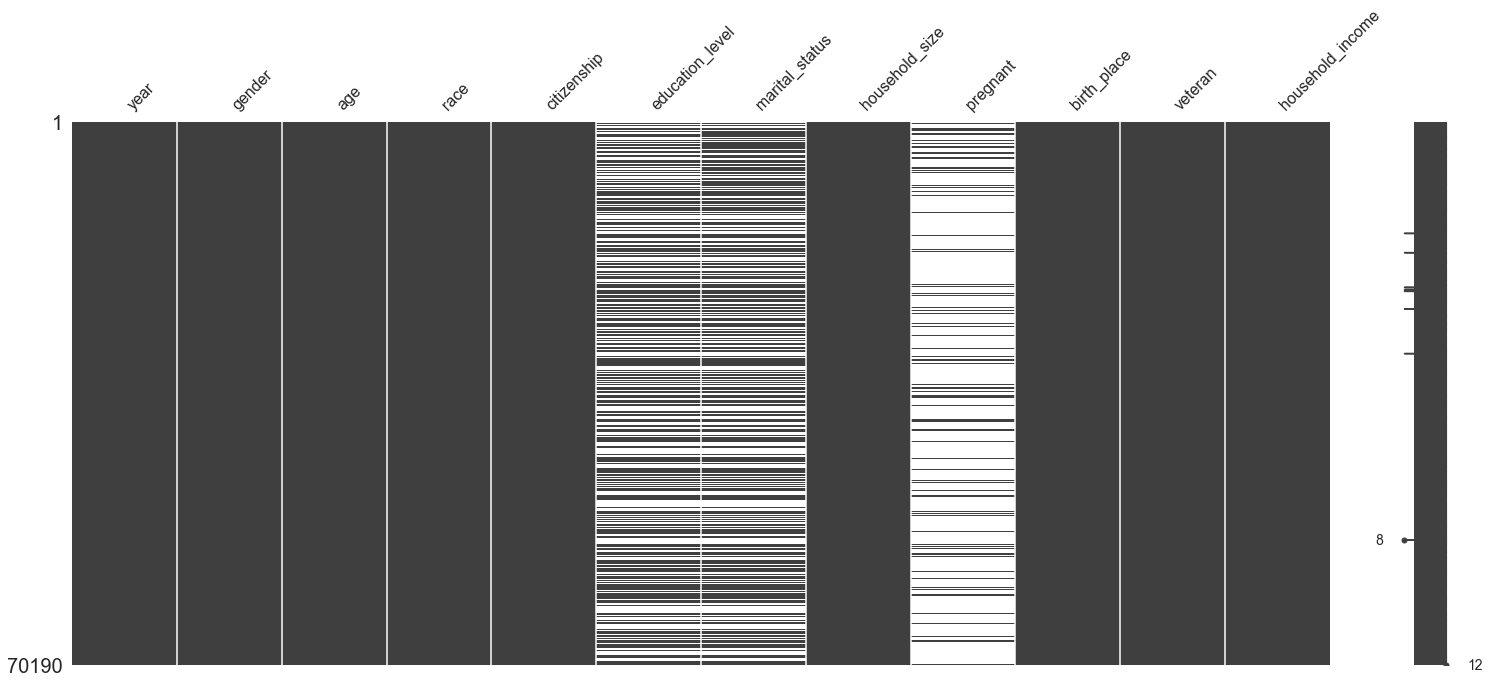

In [72]:
ms.matrix(demo_clean);

In [73]:
val_counts(demo_clean)

year value counts 



6.000     10537
4.000     10348
8.000     10175
5.000     10149
9.000      9971
7.000      9756
10.000     9254
Name: year, dtype: int64

--------------------------------------
gender value counts 



2.000    35481
1.000    34709
Name: gender, dtype: int64

--------------------------------------
age value counts 



0.000     2987
80.000    2428
2.000     2121
1.000     2005
4.000     1585
8.000     1504
6.000     1501
11.000    1461
7.000     1455
9.000     1451
3.000     1450
10.000    1438
5.000     1403
16.000    1346
14.000    1330
12.000    1302
13.000    1261
15.000    1235
18.000    1217
17.000    1212
19.000    1177
60.000     853
61.000     803
62.000     752
63.000     730
36.000     721
40.000     718
22.000     716
23.000     702
29.000     699
30.000     698
31.000     698
51.000     695
24.000     683
41.000     681
20.000     681
50.000     680
25.000     678
33.000     675
45.000     672
39.000     672
34.000     669
44.000     669
52.000     668
32.000     666
38.000     666
46.000     665
28.000     661
54.000     660
43.000     656
26.000     653
55.000     653
21.000     652
47.000     651
64.000     640
42.000     636
27.000     633
48.000     633
35.000     630
53.000     620
56.000     614
37.000     614
65.000     609
49.000     606
66.000     598
67.000     555
59.000    

--------------------------------------
race value counts 



3.000    25326
4.000    16072
1.000    13761
5.000     8184
2.000     6847
Name: race, dtype: int64

--------------------------------------
citizenship value counts 



1.000    62794
2.000     7257
7.000       87
nan         27
9.000       25
Name: citizenship, dtype: int64

--------------------------------------
education_level value counts 



nan      30441
4.000    11561
3.000     9102
5.000     8935
2.000     5708
1.000     4382
9.000       42
7.000       19
Name: education_level, dtype: int64

--------------------------------------
marital_status value counts 



nan       28722
1.000     20284
5.000      8857
3.000      4292
2.000      3371
6.000      3279
4.000      1349
77.000       31
99.000        5
Name: marital_status, dtype: int64

--------------------------------------
household_size value counts 



4.000    14745
2.000    13308
3.000    12368
5.000    11293
7.000     6421
6.000     6262
1.000     5793
Name: household_size, dtype: int64

--------------------------------------
pregnant value counts 



nan      59289
2.000     9460
1.000      754
3.000      687
Name: pregnant, dtype: int64

--------------------------------------
birth_place value counts 



1.000     56698
2.000     10686
4.000      1120
5.000      1065
3.000       588
7.000        16
77.000        8
99.000        7
9.000         2
Name: birth_place, dtype: int64

--------------------------------------
veteran value counts 



2.000    38920
0.000    26835
1.000     4424
7.000        9
9.000        2
Name: veteran, dtype: int64

--------------------------------------
household_income value counts 



15.000    9126
6.000     8250
7.000     6493
5.000     5414
8.000     5232
14.000    5171
4.000     4857
3.000     4660
9.000     3956
10.000    3240
2.000     2858
12.000    2280
11.000    2195
1.000     1818
0.000     1346
77.000    1315
99.000    1148
13.000     831
Name: household_income, dtype: int64

--------------------------------------


In [74]:
demo_clean['year'] = demo_clean['year'].astype('int64')

In [75]:
demo_clean['gender'].replace({2.000:1, 1.000:0}, inplace=True)
demo_clean['gender'] = demo_clean['gender'].astype('int64')

In [76]:
demo_clean.gender.value_counts()

1    35481
0    34709
Name: gender, dtype: int64

In [77]:
demo_clean['age'] = demo_clean['age'].astype('int64')

In [78]:
demo_clean['race'].replace({1.000:'Mexican', 
                            2.000:'Other Hispanic', 
                            3.000:'White', 
                            4.000:'Black', 
                            5.000:'Other and Multiracial'}, 
                           inplace=True)

In [79]:
demo_clean.race.value_counts()

White                    25326
Black                    16072
Mexican                  13761
Other and Multiracial     8184
Other Hispanic            6847
Name: race, dtype: int64

In [80]:
demo_clean['citizenship'].replace({1.000:'Citizen', 
                                   2.000:'Not Citizen', 
                                   7.000:'Missing', 
                                   9.000:'Missing'}, 
                                  inplace=True)
demo_clean['citizenship'].fillna('Missing', inplace=True)

In [81]:
demo_clean.citizenship.value_counts(dropna=False)

Citizen        62794
Not Citizen     7257
Missing          139
Name: citizenship, dtype: int64

In [82]:
demo_clean['education_level'].replace({1.000:'Below 9th', 
                                       2.000:'9th to 11th', 
                                       3.000:'High School', 
                                       4.000:'Some College', 
                                       5.000:'College Graduate', 
                                       7.000:'Missing', 
                                       9.000:'Missing'}, 
                                      inplace=True)
demo_clean['education_level'].fillna('Missing', inplace=True)

In [83]:
demo_clean.education_level.value_counts(dropna=False)

Missing             30502
Some College        11561
High School          9102
College Graduate     8935
9th to 11th          5708
Below 9th            4382
Name: education_level, dtype: int64

In [84]:
demo_clean['marital_status'].replace({1.000:'Married', 
                                      2.000:'Widowed', 
                                      3.000:'Divorced', 
                                      4.000:'Separated', 
                                      5.000:'Never Married',
                                      6.000:'Partner',
                                      77.000:'Missing', 
                                      99.000:'Missing'}, 
                                      inplace=True)
demo_clean['marital_status'].fillna('Missing', inplace=True)

In [85]:
demo_clean.marital_status.value_counts(dropna=False)

Missing          28758
Married          20284
Never Married     8857
Divorced          4292
Widowed           3371
Partner           3279
Separated         1349
Name: marital_status, dtype: int64

In [86]:
demo_clean['household_size'] = demo_clean['household_size'].astype('int64')

In [87]:
demo_clean['pregnant'].replace({1.000:'Yes', 
                                2.000:'No', 
                                3.000:'Missing'}, 
                                  inplace=True)
demo_clean['pregnant'].fillna('Missing', inplace=True)

In [88]:
demo_clean.pregnant.value_counts(dropna=False)

Missing    59976
No          9460
Yes          754
Name: pregnant, dtype: int64

In [89]:
demo_clean['birth_place'].replace({1.000:'USA', 
                                   2.000:'Mexico', 
                                   3.000:'Elsewhere', 
                                   4.000:'Other Spanish Country', 
                                   5.000:'Other Non Spanish Country',
                                   7.000:'Missing', 
                                   9.000:'Missing',
                                   77.000:'Missing', 
                                   99.000:'Missing'}, 
                                    inplace=True)
demo_clean['birth_place'].fillna('Missing', inplace=True)

In [90]:
demo_clean.birth_place.value_counts(dropna=False)

USA                          56698
Mexico                       10686
Other Spanish Country         1120
Other Non Spanish Country     1065
Elsewhere                      588
Missing                         33
Name: birth_place, dtype: int64

In [91]:
demo_clean['veteran'].replace({1.000:'Yes', 
                               2.000:'No', 
                               7.000:'Missing', 
                               9.000:'Missing',
                               0.000:'Missing'}, 
                                inplace=True)

In [92]:
demo_clean.veteran.value_counts(dropna=False)

No         38920
Missing    26846
Yes         4424
Name: veteran, dtype: int64

In [93]:
demo_clean['household_income'].replace({12.000: 5, 
                                        13.000: 4,
                                        14.000: 11,
                                        15.000: 12,
                                        77.000: 0, 
                                        99.000: 0}, 
                                        inplace=True)
demo_clean['household_income'] = demo_clean['household_income'].astype('int64')

In [94]:
demo_clean.household_income.value_counts(dropna=False)

12    9126
6     8250
5     7694
11    7366
7     6493
4     5688
8     5232
3     4660
9     3956
0     3809
10    3240
2     2858
1     1818
Name: household_income, dtype: int64

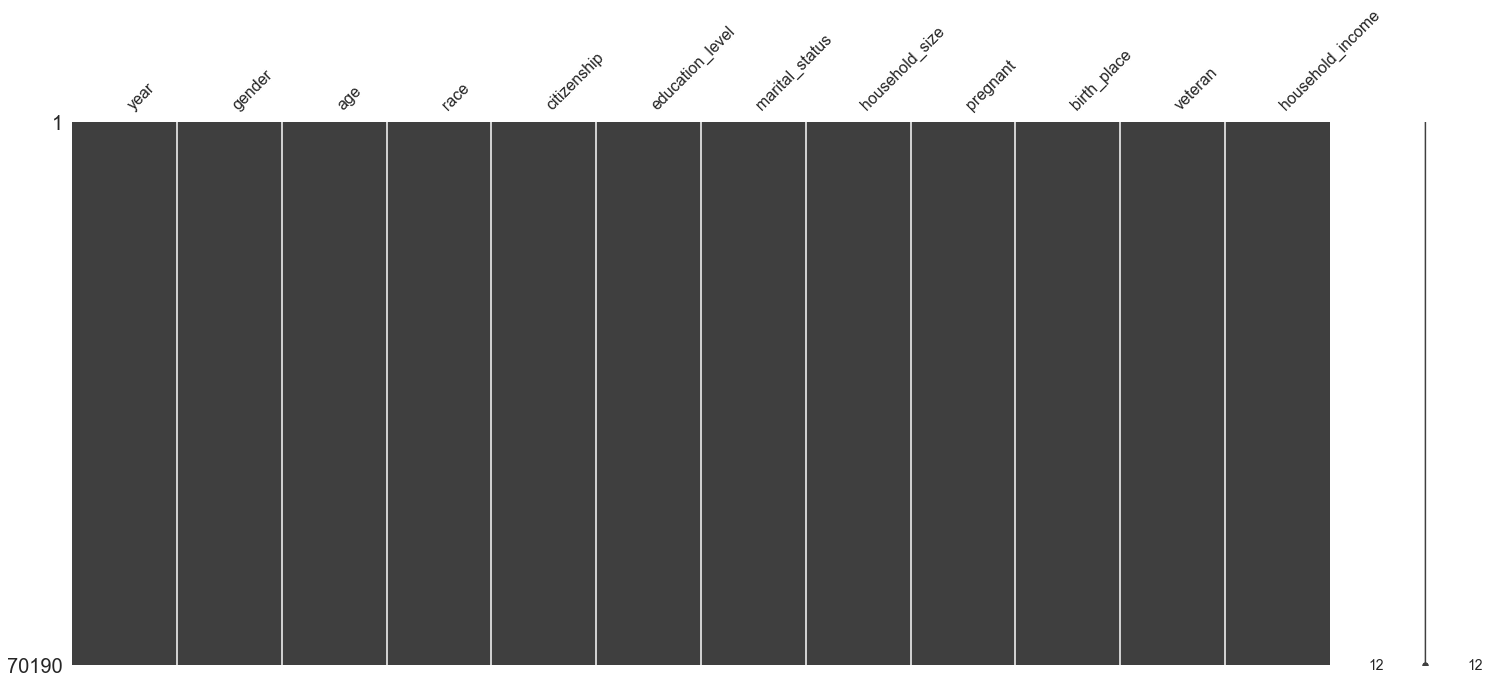

In [95]:
ms.matrix(demo_clean);

In [96]:
demo_clean.isna().sum()

year                0
gender              0
age                 0
race                0
citizenship         0
education_level     0
marital_status      0
household_size      0
pregnant            0
birth_place         0
veteran             0
household_income    0
dtype: int64

In [97]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              70190 non-null  int64 
 1   gender            70190 non-null  int64 
 2   age               70190 non-null  int64 
 3   race              70190 non-null  object
 4   citizenship       70190 non-null  object
 5   education_level   70190 non-null  object
 6   marital_status    70190 non-null  object
 7   household_size    70190 non-null  int64 
 8   pregnant          70190 non-null  object
 9   birth_place       70190 non-null  object
 10  veteran           70190 non-null  object
 11  household_income  70190 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.0+ MB


In [98]:
demo_clean.head()

,year,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income
SEQN,,,,,,,,,,,,
31127,4,0,0,White,Citizen,Missing,Missing,4,Missing,USA,Missing,4
31128,4,1,11,Black,Citizen,Missing,Missing,7,No,USA,Missing,8
31129,4,0,15,Black,Citizen,Missing,Never Married,6,Missing,USA,Missing,10
31130,4,1,85,White,Citizen,Some College,Widowed,1,Missing,USA,No,4
31131,4,1,44,Black,Citizen,Some College,Married,4,No,USA,No,11


# Medical Conditions

In [99]:
path = r'Data/Conditions'
df_medcond = glob_concat(path, '*.XPT')

['Data/Conditions\\MCQ_D.XPT',
 'Data/Conditions\\MCQ_E.XPT',
 'Data/Conditions\\MCQ_F.XPT',
 'Data/Conditions\\MCQ_G.XPT',
 'Data/Conditions\\MCQ_H.XPT',
 'Data/Conditions\\MCQ_I.XPT',
 'Data/Conditions\\MCQ_J.XPT']

In [100]:
df_medcond.head()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,MCQ053,MCQ080,MCQ092,MCD093,MCQ140,MCQ149,MCQ150G,MCQ150Q,MCQ160A,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160K,MCQ160L,MCQ160M,MCQ170K,MCQ170L,MCQ170M,MCQ180A,MCQ180B,MCQ180C,MCQ180D,MCQ180E,MCQ180F,MCQ180G,MCQ180K,MCQ180L,MCQ180M,MCQ190,MCQ220,MCQ230A,...,MCQ160O,MCQ203,MCQ206,OSQ230,RHD018,MCD180A,MCD180N,MCD180B,MCD180C,MCD180D,MCD180E,MCD180F,MCD180M,MCD180G,MCD180K,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCD240A,MCD240B,MCD240C,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D
0,31128.000,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,2.000,2.000,1.000,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31129.000,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,2.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,31130.000,2.000,nan,nan,nan,nan,2.000,2.000,9.000,nan,2.000,nan,nan,nan,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,31131.000,2.000,nan,nan,nan,nan,2.000,2.000,1.000,3.000,2.000,nan,nan,nan,2.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,nan,nan,nan,nan,42.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,31132.000,2.000,nan,nan,nan,nan,2.000,2.000,2.000,nan,2.000,nan,nan,nan,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.000,nan,2.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [101]:
df_medcond.SEQN = df_medcond.SEQN.astype('int64')
df_medcond.set_index('SEQN', verify_integrity=True, inplace=True)

In [102]:
df_medcond.head()

,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,MCQ053,MCQ080,MCQ092,MCD093,MCQ140,MCQ149,MCQ150G,MCQ150Q,MCQ160A,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160K,MCQ160L,MCQ160M,MCQ170K,MCQ170L,MCQ170M,MCQ180A,MCQ180B,MCQ180C,MCQ180D,MCQ180E,MCQ180F,MCQ180G,MCQ180K,MCQ180L,MCQ180M,MCQ190,MCQ220,MCQ230A,MCQ230B,...,MCQ160O,MCQ203,MCQ206,OSQ230,RHD018,MCD180A,MCD180N,MCD180B,MCD180C,MCD180D,MCD180E,MCD180F,MCD180M,MCD180G,MCD180K,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCD240A,MCD240B,MCD240C,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31128,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,2.000,2.000,1.000,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31129,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,2.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31130,2.000,nan,nan,nan,nan,2.000,2.000,9.000,nan,2.000,nan,nan,nan,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,2.000,nan,nan,nan,nan,2.000,2.000,1.000,3.000,2.000,nan,nan,nan,2.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,nan,nan,nan,nan,42.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31132,2.000,nan,nan,nan,nan,2.000,2.000,2.000,nan,2.000,nan,nan,nan,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.000,nan,2.000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [103]:
list(df_medcond.columns.sort_values())

['AGQ030',
 'MCD093',
 'MCD180A',
 'MCD180B',
 'MCD180C',
 'MCD180D',
 'MCD180E',
 'MCD180F',
 'MCD180G',
 'MCD180K',
 'MCD180L',
 'MCD180M',
 'MCD180N',
 'MCD240A',
 'MCD240B',
 'MCD240C',
 'MCD330',
 'MCQ010',
 'MCQ025',
 'MCQ035',
 'MCQ040',
 'MCQ050',
 'MCQ051',
 'MCQ053',
 'MCQ070',
 'MCQ075',
 'MCQ080',
 'MCQ082',
 'MCQ084',
 'MCQ086',
 'MCQ092',
 'MCQ140',
 'MCQ149',
 'MCQ150G',
 'MCQ150Q',
 'MCQ151',
 'MCQ160A',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ160F',
 'MCQ160G',
 'MCQ160K',
 'MCQ160L',
 'MCQ160M',
 'MCQ160N',
 'MCQ160O',
 'MCQ170K',
 'MCQ170L',
 'MCQ170M',
 'MCQ180A',
 'MCQ180B',
 'MCQ180C',
 'MCQ180D',
 'MCQ180E',
 'MCQ180F',
 'MCQ180G',
 'MCQ180K',
 'MCQ180L',
 'MCQ180M',
 'MCQ180N',
 'MCQ190',
 'MCQ191',
 'MCQ195',
 'MCQ203',
 'MCQ206',
 'MCQ220',
 'MCQ230A',
 'MCQ230B',
 'MCQ230C',
 'MCQ230D',
 'MCQ240A',
 'MCQ240AA',
 'MCQ240B',
 'MCQ240BB',
 'MCQ240C',
 'MCQ240CC',
 'MCQ240D',
 'MCQ240DD',
 'MCQ240DK',
 'MCQ240E',
 'MCQ240F',
 'MCQ240G',
 'MCQ240H',
 

In [104]:
medcond_tokeep = ['AGQ030', 'MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 
                  'MCQ053', 'MCQ080', 'MCQ092', 'MCQ160A', 'MCQ160B', 
                  'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 
                  'MCQ160K', 'MCQ160L', 'MCQ160M', 'MCQ170K', 'MCQ170L', 
                  'MCQ170M', 'MCQ180A', 'MCD180A', 'MCQ180B', 'MCD180B', 
                  'MCQ180C', 'MCD180C', 'MCQ180D', 'MCD180D', 'MCQ180E', 
                  'MCD180E', 'MCQ180F', 'MCD180F', 'MCQ180G', 'MCD180G', 
                  'MCQ180K', 'MCD180K', 'MCQ180L', 'MCD180L', 'MCQ180M', 
                  'MCD180M', 'MCQ190', 'MCQ191', 'MCQ195', 'MCQ220', 'MCQ230A', 
                  'MCQ230B', 'MCQ230C', 'MCQ230D', 'MCQ240DK', 'MCD240A', 
                  'MCQ300A', 'MCQ300B', 'MCQ300C']

len(medcond_tokeep)

54

In [105]:
medcond_clean = cols_tokeep(df_medcond, medcond_tokeep)

In [106]:
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCQ010    67201 non-null  float64
 1   MCQ025    9977 non-null   float64
 2   MCQ035    9979 non-null   float64
 3   MCQ050    4874 non-null   float64
 4   MCQ053    67201 non-null  float64
 5   MCQ080    44700 non-null  float64
 6   MCQ092    58636 non-null  float64
 7   MCQ160A   39747 non-null  float64
 8   MCQ160B   39748 non-null  float64
 9   MCQ160C   39748 non-null  float64
 10  MCQ160D   39748 non-null  float64
 11  MCQ160E   39748 non-null  float64
 12  MCQ160F   39748 non-null  float64
 13  MCQ160G   39748 non-null  float64
 14  MCQ160K   39748 non-null  float64
 15  MCQ160L   39748 non-null  float64
 16  MCQ160M   39748 non-null  float64
 17  MCQ170K   2292 non-null   float64
 18  MCQ170L   1584 non-null   float64
 19  MCQ170M   4010 non-null   float64
 20  MCQ180A   9019 non-null

## Onset Age Columns

In [107]:
col_pairs = [('MCD180A', 'MCQ180A'), 
             ('MCD180B', 'MCQ180B'), 
             ('MCD180C', 'MCQ180C'), 
             ('MCD180D', 'MCQ180D'), 
             ('MCD180E', 'MCQ180E'), 
             ('MCD180F', 'MCQ180F'), 
             ('MCD180G', 'MCQ180G'), 
             ('MCD180K', 'MCQ180K'), 
             ('MCD180L', 'MCQ180L'), 
             ('MCD180M', 'MCQ180M'), 
             ('MCD240A', 'MCQ240DK')]

In [108]:
col_disease = ['arthritis', 'heart_failure', 'heart_disease', 'angina', 
              'heart_attack', 'stroke', 'emphysema', 'bronchitis', 
              'liver_condition', 'thyroid_problem', 'cancer']

In [109]:
disease_dict = dict(zip(col_disease, col_pairs))
disease_dict

{'arthritis': ('MCD180A', 'MCQ180A'),
 'heart_failure': ('MCD180B', 'MCQ180B'),
 'heart_disease': ('MCD180C', 'MCQ180C'),
 'angina': ('MCD180D', 'MCQ180D'),
 'heart_attack': ('MCD180E', 'MCQ180E'),
 'stroke': ('MCD180F', 'MCQ180F'),
 'emphysema': ('MCD180G', 'MCQ180G'),
 'bronchitis': ('MCD180K', 'MCQ180K'),
 'liver_condition': ('MCD180L', 'MCQ180L'),
 'thyroid_problem': ('MCD180M', 'MCQ180M'),
 'cancer': ('MCD240A', 'MCQ240DK')}

In [110]:
for key in disease_dict:
    for item in disease_dict[key]:
        medcond_clean[item].fillna(0, inplace=True)
        medcond_clean[item] = medcond_clean[item].replace(99999, 0)
        medcond_clean[item] = medcond_clean[item].replace(77777, 0)
    medcond_clean[f'{key}_onset'] = medcond_clean[disease_dict[key][0]] + medcond_clean[disease_dict[key][1]]
    medcond_clean[f'{key}_onset'] = medcond_clean[f'{key}_onset'].astype('int64')
    medcond_clean.drop(columns=[disease_dict[key][0], disease_dict[key][1]], inplace=True)   

In [111]:
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MCQ010                 67201 non-null  float64
 1   MCQ025                 9977 non-null   float64
 2   MCQ035                 9979 non-null   float64
 3   MCQ050                 4874 non-null   float64
 4   MCQ053                 67201 non-null  float64
 5   MCQ080                 44700 non-null  float64
 6   MCQ092                 58636 non-null  float64
 7   MCQ160A                39747 non-null  float64
 8   MCQ160B                39748 non-null  float64
 9   MCQ160C                39748 non-null  float64
 10  MCQ160D                39748 non-null  float64
 11  MCQ160E                39748 non-null  float64
 12  MCQ160F                39748 non-null  float64
 13  MCQ160G                39748 non-null  float64
 14  MCQ160K                39748 non-null  float64
 1

In [112]:
medcond_clean.head()

,MCQ010,MCQ025,MCQ035,MCQ050,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160K,MCQ160L,MCQ160M,MCQ170K,MCQ170L,MCQ170M,MCQ190,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300A,MCQ300B,MCQ300C,MCQ191,MCQ195,AGQ030,arthritis_onset,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,emphysema_onset,bronchitis_onset,liver_condition_onset,thyroid_problem_onset,cancer_onset
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31128,2.000,nan,nan,nan,2.000,nan,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0
31129,2.000,nan,nan,nan,2.000,nan,2.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0
31130,2.000,nan,nan,nan,2.000,2.000,9.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,nan,nan,nan,nan,2.000,nan,nan,nan,nan,2.000,1.000,2.000,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0
31131,2.000,nan,nan,nan,2.000,2.000,1.000,2.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,nan,nan,nan,nan,2.000,nan,nan,nan,nan,1.000,2.000,1.000,nan,nan,nan,0,42,0,0,0,0,0,0,0,0,0
31132,2.000,nan,nan,nan,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,nan,nan,1.000,nan,2.000,nan,nan,nan,nan,2.000,2.000,2.000,nan,nan,nan,0,0,0,0,0,0,0,0,0,63,0


## Arthritis Type Columns

In [113]:
medcond_clean['MCQ190'].value_counts(dropna=False)

nan      64201
9.000     1121
2.000      910
1.000      584
3.000      386
7.000        1
Name: MCQ190, dtype: int64

In [114]:
medcond_clean['MCQ190'].replace({1.000:'Rheumatoid', 
                                2.000:'Osteoarthritis', 
                                3.000:'Other', 
                                7.000:'Missing', 
                                9.000:'Missing'}, 
                               inplace=True)

In [115]:
medcond_clean['MCQ190'].fillna('', inplace=True)

In [116]:
medcond_clean['MCQ190'].value_counts(dropna=False)

                  64201
Missing            1122
Osteoarthritis      910
Rheumatoid          584
Other               386
Name: MCQ190, dtype: int64

In [117]:
medcond_clean['MCQ191'].value_counts(dropna=False)

nan      65529
9.000      605
2.000      514
1.000      316
4.000      226
3.000        8
7.000        5
Name: MCQ191, dtype: int64

In [118]:
medcond_clean['MCQ191'].replace({1.000:'Rheumatoid', 
                                2.000:'Osteoarthritis', 
                                3.000:'Psoriatic',
                                4.000:'Other',
                                7.000:'Missing', 
                                9.000:'Missing'}, 
                               inplace=True)

In [119]:
medcond_clean['MCQ191'].fillna('', inplace=True)

In [120]:
medcond_clean['MCQ191'].value_counts(dropna=False)

                  65529
Missing             610
Osteoarthritis      514
Rheumatoid          316
Other               226
Psoriatic             8
Name: MCQ191, dtype: int64

In [121]:
medcond_clean['MCQ195'].value_counts(dropna=False)

nan      61165
1.000     2597
9.000     1664
2.000     1132
4.000      559
3.000       82
7.000        4
Name: MCQ195, dtype: int64

In [122]:
medcond_clean['MCQ195'].replace({1.000:'Osteoarthritis', 
                                2.000:'Rheumatoid', 
                                3.000:'Psoriatic',
                                4.000:'Other',
                                7.000:'Missing', 
                                9.000:'Missing'}, 
                               inplace=True)

In [123]:
medcond_clean['MCQ195'].fillna('', inplace=True)

In [124]:
medcond_clean['MCQ195'].value_counts(dropna=False)

                  61165
Osteoarthritis     2597
Missing            1668
Rheumatoid         1132
Other               559
Psoriatic            82
Name: MCQ195, dtype: int64

In [125]:
medcond_clean['arthritis_type'] = medcond_clean['MCQ190'] + medcond_clean['MCQ191'] + medcond_clean['MCQ195']

In [126]:
medcond_clean['arthritis_type'].value_counts(dropna=False)

                  56489
Osteoarthritis     4021
Missing            3400
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

In [127]:
medcond_clean.drop(columns=['MCQ190', 'MCQ191', 'MCQ195'], inplace=True)  

In [128]:
medcond_clean['arthritis_type'].value_counts(dropna=False)

                  56489
Osteoarthritis     4021
Missing            3400
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

In [129]:
medcond_clean['arthritis_type'] = medcond_clean['arthritis_type'].replace('', 'Missing')

In [130]:
medcond_clean['arthritis_type'].value_counts(dropna=False)

Missing           59889
Osteoarthritis     4021
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

## Renaming Columns

In [131]:
medcond_clean.columns

Index(['MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 'MCQ053', 'MCQ080', 'MCQ092',
       'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F',
       'MCQ160G', 'MCQ160K', 'MCQ160L', 'MCQ160M', 'MCQ170K', 'MCQ170L',
       'MCQ170M', 'MCQ220', 'MCQ230A', 'MCQ230B', 'MCQ230C', 'MCQ230D',
       'MCQ300A', 'MCQ300B', 'MCQ300C', 'AGQ030', 'arthritis_onset',
       'heart_failure_onset', 'heart_disease_onset', 'angina_onset',
       'heart_attack_onset', 'stroke_onset', 'emphysema_onset',
       'bronchitis_onset', 'liver_condition_onset', 'thyroid_problem_onset',
       'cancer_onset', 'arthritis_type'],
      dtype='object')

In [132]:
medcond_clean.rename(columns={'MCQ010': 'asthma', 
                              'MCQ025': 'asthma_onset', 
                              'MCQ035': 'asthma_currently', 
                              'MCQ050': 'asthma_emergency', 
                              'MCQ053': 'anemia', 
                              'MCQ080': 'ever_overweight', 
                              'MCQ092': 'blood_transfusion',
                              'MCQ160A': 'arthritis', 
                              'MCQ160B': 'heart_failure', 
                              'MCQ160C': 'heart_disease', 
                              'MCQ160D': 'angina', 
                              'MCQ160E': 'heart_attack', 
                              'MCQ160F': 'stroke', 
                              'MCQ160G': 'emphysema', 
                              'MCQ160K': 'bronchitis', 
                              'MCQ160L': 'liver_condition', 
                              'MCQ160M': 'thyroid_problem', 
                              'MCQ170K': 'brochitis_currently', 
                              'MCQ170L': 'liver_condition_currently',
                              'MCQ170M': 'thyroid_problem_currently',  
                              'MCQ220': 'cancer', 
                              'MCQ230A': 'first_cancer_type', 
                              'MCQ230B': 'second_cancer_type', 
                              'MCQ230C': 'third_cancer_type',
                              'MCQ230D': 'fourth_cancer_count', 
                              'MCQ300A': 'heart_attack_relative', 
                              'MCQ300B': 'asthma_relative', 
                              'MCQ300C': 'diabetes_relative', 
                              'AGQ030': 'hay_fever'
                              }, inplace=True)

In [133]:
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asthma                     67201 non-null  float64
 1   asthma_onset               9977 non-null   float64
 2   asthma_currently           9979 non-null   float64
 3   asthma_emergency           4874 non-null   float64
 4   anemia                     67201 non-null  float64
 5   ever_overweight            44700 non-null  float64
 6   blood_transfusion          58636 non-null  float64
 7   arthritis                  39747 non-null  float64
 8   heart_failure              39748 non-null  float64
 9   heart_disease              39748 non-null  float64
 10  angina                     39748 non-null  float64
 11  heart_attack               39748 non-null  float64
 12  stroke                     39748 non-null  float64
 13  emphysema                  39748 non-null

## Clean Column Values

In [134]:
val_counts(medcond_clean)

asthma value counts 



2.000    57147
1.000     9979
9.000       70
7.000        5
nan          2
Name: asthma, dtype: int64

--------------------------------------
asthma_onset value counts 



nan          57226
1.000         2085
2.000          682
5.000          601
3.000          529
6.000          450
4.000          440
10.000         412
7.000          380
8.000          368
12.000         285
9.000          241
13.000         178
40.000         159
11.000         158
30.000         154
15.000         148
99999.000      141
50.000         140
14.000         136
16.000         127
35.000         104
25.000         103
18.000         102
20.000          89
45.000          85
60.000          78
55.000          68
22.000          65
17.000          64
28.000          59
21.000          53
65.000          50
42.000          48
38.000          48
19.000          47
23.000          43
52.000          39
70.000          38
27.000          38
37.000          37
32.000          37
44.000          36
58.000          35
53.000          35
48.000          35
24.000          34
29.000          34
80.000          34
47.000          34
26.000          34
62.000          33
33.000      

--------------------------------------
asthma_currently value counts 



nan      57224
1.000     6104
2.000     3708
9.000      166
7.000        1
Name: asthma_currently, dtype: int64

--------------------------------------
asthma_emergency value counts 



nan      62329
2.000     3687
1.000     1186
9.000        1
Name: asthma_emergency, dtype: int64

--------------------------------------
anemia value counts 



2.000    65087
1.000     2056
9.000       52
7.000        6
nan          2
Name: anemia, dtype: int64

--------------------------------------
ever_overweight value counts 



2.000    30109
nan      22503
1.000    14556
9.000       33
7.000        2
Name: ever_overweight, dtype: int64

--------------------------------------
blood_transfusion value counts 



2.000    52979
nan       8567
1.000     5120
9.000      533
7.000        4
Name: blood_transfusion, dtype: int64

--------------------------------------
arthritis value counts 



2.000    28947
nan      27456
1.000    10714
9.000       85
7.000        1
Name: arthritis, dtype: int64

--------------------------------------
heart_failure value counts 



2.000    38281
nan      27455
1.000     1355
9.000      111
7.000        1
Name: heart_failure, dtype: int64

--------------------------------------
heart_disease value counts 



2.000    37940
nan      27455
1.000     1644
9.000      162
7.000        2
Name: heart_disease, dtype: int64

--------------------------------------
angina value counts 



2.000    38584
nan      27455
1.000     1033
9.000      129
7.000        2
Name: angina, dtype: int64

--------------------------------------
heart_attack value counts 



2.000    37971
nan      27455
1.000     1712
9.000       64
7.000        1
Name: heart_attack, dtype: int64

--------------------------------------
stroke value counts 



2.000    38098
nan      27455
1.000     1591
9.000       58
7.000        1
Name: stroke, dtype: int64

--------------------------------------
emphysema value counts 



2.000    38867
nan      27455
1.000      825
9.000       55
7.000        1
Name: emphysema, dtype: int64

--------------------------------------
bronchitis value counts 



2.000    37380
nan      27455
1.000     2292
9.000       75
7.000        1
Name: bronchitis, dtype: int64

--------------------------------------
liver_condition value counts 



2.000    38084
nan      27455
1.000     1584
9.000       79
7.000        1
Name: liver_condition, dtype: int64

--------------------------------------
thyroid_problem value counts 



2.000    35644
nan      27455
1.000     4010
9.000       90
7.000        4
Name: thyroid_problem, dtype: int64

--------------------------------------
brochitis_currently value counts 



nan      64911
2.000     1157
1.000     1076
9.000       59
Name: brochitis_currently, dtype: int64

--------------------------------------
liver_condition_currently value counts 



nan      65619
1.000      860
2.000      577
9.000      146
7.000        1
Name: liver_condition_currently, dtype: int64

--------------------------------------
thyroid_problem_currently value counts 



nan      63193
1.000     2944
2.000      923
9.000      142
7.000        1
Name: thyroid_problem_currently, dtype: int64

--------------------------------------
cancer value counts 



2.000    35932
nan      27455
1.000     3782
9.000       33
7.000        1
Name: cancer, dtype: int64

--------------------------------------
first_cancer_type value counts 



nan       63423
14.000      594
30.000      567
32.000      562
33.000      279
16.000      251
15.000      244
25.000      219
39.000      168
38.000      144
23.000       93
10.000       89
24.000       85
28.000       79
37.000       77
19.000       65
21.000       38
35.000       30
99.000       28
17.000       21
26.000       20
36.000       19
22.000       18
13.000       16
20.000       16
12.000       14
29.000       12
31.000       12
11.000        9
34.000        7
18.000        2
9.000         1
27.000        1
Name: first_cancer_type, dtype: int64

--------------------------------------
second_cancer_type value counts 



nan       66802
30.000       45
32.000       45
33.000       40
39.000       39
16.000       30
25.000       29
38.000       23
28.000       22
14.000       21
10.000       15
19.000       10
12.000        9
31.000        9
37.000        9
23.000        8
24.000        8
22.000        7
15.000        6
21.000        6
20.000        4
17.000        4
26.000        3
35.000        3
13.000        2
29.000        2
11.000        2
Name: second_cancer_type, dtype: int64

--------------------------------------
third_cancer_type value counts 



nan       67157
32.000        6
39.000        5
33.000        4
25.000        4
30.000        4
38.000        3
37.000        3
16.000        3
14.000        2
22.000        2
23.000        2
21.000        2
28.000        2
12.000        1
11.000        1
13.000        1
15.000        1
Name: third_cancer_type, dtype: int64

--------------------------------------
fourth_cancer_count value counts 



nan       67197
66.000        6
Name: fourth_cancer_count, dtype: int64

--------------------------------------
heart_attack_relative value counts 



2.000    33906
nan      27455
1.000     4816
9.000     1021
7.000        5
Name: heart_attack_relative, dtype: int64

--------------------------------------
asthma_relative value counts 



2.000    41287
1.000    12782
nan      11999
9.000     1127
7.000        8
Name: asthma_relative, dtype: int64

--------------------------------------
diabetes_relative value counts 



nan      27455
2.000    22559
1.000    16387
9.000      795
7.000        7
Name: diabetes_relative, dtype: int64

--------------------------------------
hay_fever value counts 



nan      64562
2.000     1939
1.000      688
9.000       14
Name: hay_fever, dtype: int64

--------------------------------------
arthritis_onset value counts 



0     56698
50      762
60      564
40      547
55      484
45      439
65      344
70      318
35      286
80      275
30      274
52      203
48      202
58      200
62      167
75      166
54      165
57      161
42      161
25      160
59      160
53      156
49      153
56      150
68      149
63      146
38      145
64      135
47      132
51      128
43      123
32      120
67      120
44      113
20      108
61      106
66      102
72      102
36      101
39      101
69      101
46      100
37       93
28       93
16       91
33       81
41       80
74       72
71       71
27       70
73       70
22       68
78       65
26       64
23       63
31       62
34       61
18       60
77       58
76       56
29       54
21       52
24       51
15       46
79       44
19       43
17       43
10       42
13       31
14       25
12       21
85       19
5        19
8        14
6        13
2        13
4        12
3        11
7        11
9        10
1         8
82        5
11        4
83  

--------------------------------------
heart_failure_onset value counts 



0     65881
80       90
60       64
70       57
50       54
65       51
55       43
58       35
63       34
54       32
56       32
53       31
45       31
64       31
52       30
75       30
69       28
62       27
68       26
71       26
59       24
72       24
40       24
57       24
67       24
73       23
61       21
47       21
46       21
74       19
76       19
66       19
79       18
42       18
48       18
78       17
49       16
43       15
35       15
44       14
37       12
51       12
41       11
38       10
36       10
39        9
85        9
34        8
77        8
20        6
30        6
26        5
25        5
32        5
31        5
29        5
1         5
33        4
81        4
18        4
28        4
15        3
6         3
16        3
24        2
10        2
12        2
83        2
22        2
27        2
7         1
13        1
4         1
19        1
3         1
2         1
21        1
84        1
Name: heart_failure_onset, dtype: int64

--------------------------------------
heart_disease_onset value counts 



0     65589
60       82
50       77
55       75
80       70
65       64
70       55
58       53
62       48
56       47
66       46
68       45
54       43
59       43
53       41
57       36
64       36
49       35
45       34
40       32
61       32
71       30
72       30
63       29
48       28
74       28
52       28
67       28
46       28
69       27
75       26
73       23
42       23
51       22
47       22
76       19
78       19
79       17
35       16
44       15
77       13
38       13
43       11
41       11
37       10
36        8
85        8
39        7
30        7
32        6
11        5
34        5
33        5
5         4
16        4
10        4
82        4
22        3
28        3
25        3
20        3
27        3
1         2
6         2
15        2
8         2
12        2
13        2
26        2
7         1
17        1
81        1
3         1
18        1
21        1
31        1
23        1
Name: heart_disease_onset, dtype: int64

--------------------------------------
angina_onset value counts 



0     66190
60       53
50       48
45       40
55       39
40       37
58       32
80       30
59       28
35       28
62       26
46       26
48       23
65       23
70       23
63       22
56       22
53       21
51       21
72       21
57       19
69       19
49       19
52       18
54       17
47       17
42       16
61       16
75       15
41       14
30       14
44       13
37       13
68       12
67       12
64       11
77       11
36       10
43       10
74       10
76       10
66       10
71        9
25        9
38        9
32        8
73        8
20        7
39        7
79        7
28        7
23        6
26        5
16        5
31        5
34        4
33        4
29        4
27        4
10        4
78        4
15        4
18        4
7         3
12        2
8         2
85        2
21        2
84        2
83        1
9         1
22        1
6         1
17        1
81        1
82        1
Name: angina_onset, dtype: int64

--------------------------------------
heart_attack_onset value counts 



0     65525
50       74
55       71
60       69
80       68
65       54
70       48
58       46
56       43
59       42
45       41
53       41
57       41
54       40
64       40
62       39
51       37
40       35
46       35
52       34
48       34
63       33
61       33
72       32
68       32
47       31
49       31
69       30
35       28
71       27
66       26
67       26
42       26
74       25
38       23
37       22
75       20
78       20
73       19
79       19
41       19
43       18
39       17
44       15
76       14
77       14
32       14
85       13
30       13
25        9
36        9
33        9
31        9
20        9
34        6
29        6
24        5
28        5
16        4
21        4
27        4
26        4
23        3
82        2
10        2
84        2
14        2
83        2
15        2
9         1
6         1
22        1
4         1
2         1
1         1
19        1
81        1
Name: heart_attack_onset, dtype: int64

--------------------------------------
stroke_onset value counts 



0     65646
80      118
65       67
55       58
70       55
50       51
60       50
62       46
53       40
58       38
75       33
64       32
63       32
45       31
66       31
51       30
69       30
67       30
47       30
72       29
68       28
43       28
73       28
52       28
40       27
61       27
48       27
54       27
78       26
76       26
79       25
59       25
56       23
71       23
57       22
42       22
74       22
49       21
77       20
44       19
41       16
35       15
46       14
30       14
39       13
38       12
36       10
25       10
85        9
23        8
32        8
22        6
18        6
34        6
20        6
33        6
31        6
29        6
26        6
28        5
27        4
15        4
37        4
19        4
21        4
24        4
16        3
7         3
17        2
10        2
84        2
2         2
1         2
81        2
6         1
8         1
5         1
4         1
3         1
11        1
13        1
82        1
Name: stroke_ons

--------------------------------------
emphysema_onset value counts 



0     66395
60       46
50       38
65       36
55       34
40       34
45       32
70       32
66       21
58       19
56       19
62       18
68       17
51       17
59       17
72       17
80       15
75       15
61       15
71       15
30       15
43       14
76       14
57       14
35       13
67       13
63       13
44       13
49       12
48       12
53       12
32       11
42       10
73       10
69       10
64       10
39        9
47        9
38        9
54        9
41        8
77        7
52        7
20        7
36        6
37        6
78        6
46        5
74        5
33        5
26        5
79        5
27        4
28        4
22        4
10        3
21        3
34        3
31        2
29        2
24        2
14        2
82        2
16        2
85        2
13        2
83        2
4         1
23        1
5         1
6         1
8         1
18        1
11        1
81        1
Name: emphysema_onset, dtype: int64

--------------------------------------
bronchitis_onset value counts 



0     65000
16      124
50       92
40       90
30       89
35       69
25       66
20       54
55       53
60       50
18       43
10       43
45       43
15       41
32       41
12       40
1        38
24       37
65       33
5        33
70       31
28       30
17       30
13       30
7        30
58       28
8        28
42       27
14       27
38       26
52       25
19       25
48       25
80       25
21       24
6        23
22       23
54       22
23       22
47       22
43       21
51       21
44       21
61       21
66       20
33       20
56       20
4        20
2        19
75       19
27       19
26       19
57       18
9        18
41       17
53       17
34       17
62       16
29       15
69       15
73       15
67       15
3        14
46       13
59       13
37       13
36       13
31       13
68       12
11       11
49       11
76       11
74       10
63       10
78        9
39        9
64        9
71        7
72        7
79        6
85        4
77        3
Name: bronchitis

--------------------------------------
liver_condition_onset value counts 



0     65639
35       67
45       64
40       61
50       53
30       48
60       47
55       42
25       37
42       35
48       32
52       31
47       30
56       29
54       28
36       27
20       26
28       26
32       26
21       25
58       25
33       24
37       24
59       24
16       24
43       24
44       24
65       23
62       23
51       23
41       22
46       22
53       22
24       21
38       21
34       21
49       20
27       19
57       19
19       19
29       18
64       17
15       16
67       16
17       16
80       16
23       16
22       15
61       15
66       15
70       15
10       14
39       13
69       13
63       12
26       12
31       12
13       12
68       10
7         8
73        8
18        8
74        8
11        8
6         7
14        7
71        6
75        6
12        6
8         5
1         5
77        4
79        4
78        4
5         4
9         4
72        4
76        3
4         2
3         1
82        1
Name: liver_condition_onset,

--------------------------------------
thyroid_problem_onset value counts 



0     63264
40      184
50      180
30      168
45      128
35      126
55      117
60      113
80      112
25      103
65       98
70       72
32       71
28       66
38       66
52       66
20       65
48       60
42       59
16       59
43       58
47       57
34       56
58       56
36       55
21       52
75       51
22       50
26       50
53       49
29       49
24       48
56       48
18       47
64       46
62       46
49       45
27       45
31       45
41       45
44       42
59       42
39       42
63       41
46       40
33       40
51       39
54       39
68       38
15       38
37       38
61       37
57       36
17       34
66       33
72       32
19       30
23       30
14       30
12       28
67       28
13       27
74       27
71       26
77       21
69       21
73       21
76       20
78       16
10       13
79       12
8        10
5         9
7         8
11        7
9         7
85        6
2         4
6         3
1         3
4         3
82        2
83        2
84  

--------------------------------------
cancer_onset value counts 



0     66609
80       42
50       20
70       19
55       18
65       17
62       17
64       16
60       16
59       16
66       15
68       15
53       15
45       14
40       14
63       14
61       14
47       13
75       13
76       13
54       13
57       12
69       12
67       11
52       11
30       10
42       10
71       10
58        9
73        9
74        8
48        8
38        8
28        8
72        8
41        8
56        7
44        6
51        6
79        6
16        6
78        5
22        5
32        5
33        5
36        5
49        5
20        4
46        4
23        4
26        4
27        4
77        4
35        4
37        4
43        4
25        4
19        3
24        3
29        2
21        2
34        2
39        2
17        1
18        1
85        1
Name: cancer_onset, dtype: int64

--------------------------------------
arthritis_type value counts 



Missing           59889
Osteoarthritis     4021
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

--------------------------------------


In [135]:
yes_no_cols = ['arthritis', 'heart_failure', 'heart_disease', 'angina', 
              'heart_attack', 'stroke', 'emphysema', 'bronchitis', 
              'liver_condition', 'thyroid_problem', 'cancer', 'asthma', 
              'anemia', 'blood_transfusion', 'heart_attack_relative', 
              'asthma_relative', 'diabetes_relative', 'hay_fever', 
              'ever_overweight', 'asthma_currently', 'asthma_emergency', 
              'brochitis_currently', 'liver_condition_currently', 
              'thyroid_problem_currently']

In [136]:
for col in yes_no_cols:
    medcond_clean[col].replace({2.000: 0, 
                                 7.000: 0, 
                                 9.000: 0}, 
                                inplace=True)
    medcond_clean[col].fillna(0, inplace=True)
    medcond_clean[col] = medcond_clean[col].astype('int64')

In [137]:
medcond_clean['asthma_onset'].replace(99999, 0, inplace=True)
medcond_clean['asthma_onset'].fillna(0, inplace=True)
medcond_clean['asthma_onset'] = medcond_clean['asthma_onset'].astype('int64')

In [138]:
medcond_clean['fourth_cancer_count'].replace(66.000, 1, inplace=True)
medcond_clean['fourth_cancer_count'].fillna(0, inplace=True)
medcond_clean['fourth_cancer_count'] = medcond_clean['fourth_cancer_count'].astype('int64')

In [139]:
val_counts(medcond_clean)

asthma value counts 



0    57224
1     9979
Name: asthma, dtype: int64

--------------------------------------
asthma_onset value counts 



0     57367
1      2085
2       682
5       601
3       529
6       450
4       440
10      412
7       380
8       368
12      285
9       241
13      178
40      159
11      158
30      154
15      148
50      140
14      136
16      127
35      104
25      103
18      102
20       89
45       85
60       78
55       68
22       65
17       64
28       59
21       53
65       50
38       48
42       48
19       47
23       43
52       39
27       38
70       38
32       37
37       37
44       36
48       35
58       35
53       35
80       34
29       34
24       34
26       34
47       34
62       33
33       32
36       31
34       30
46       28
49       25
56       25
59       23
43       23
54       22
68       20
63       20
31       20
51       19
57       19
39       19
61       18
41       17
64       16
69       15
75       14
73       14
72       12
67       12
78        9
74        8
76        7
71        6
66        6
77        5
85        3
79        3
83        2
82  

--------------------------------------
asthma_currently value counts 



0    61099
1     6104
Name: asthma_currently, dtype: int64

--------------------------------------
asthma_emergency value counts 



0    66017
1     1186
Name: asthma_emergency, dtype: int64

--------------------------------------
anemia value counts 



0    65147
1     2056
Name: anemia, dtype: int64

--------------------------------------
ever_overweight value counts 



0    52647
1    14556
Name: ever_overweight, dtype: int64

--------------------------------------
blood_transfusion value counts 



0    62083
1     5120
Name: blood_transfusion, dtype: int64

--------------------------------------
arthritis value counts 



0    56489
1    10714
Name: arthritis, dtype: int64

--------------------------------------
heart_failure value counts 



0    65848
1     1355
Name: heart_failure, dtype: int64

--------------------------------------
heart_disease value counts 



0    65559
1     1644
Name: heart_disease, dtype: int64

--------------------------------------
angina value counts 



0    66170
1     1033
Name: angina, dtype: int64

--------------------------------------
heart_attack value counts 



0    65491
1     1712
Name: heart_attack, dtype: int64

--------------------------------------
stroke value counts 



0    65612
1     1591
Name: stroke, dtype: int64

--------------------------------------
emphysema value counts 



0    66378
1      825
Name: emphysema, dtype: int64

--------------------------------------
bronchitis value counts 



0    64911
1     2292
Name: bronchitis, dtype: int64

--------------------------------------
liver_condition value counts 



0    65619
1     1584
Name: liver_condition, dtype: int64

--------------------------------------
thyroid_problem value counts 



0    63193
1     4010
Name: thyroid_problem, dtype: int64

--------------------------------------
brochitis_currently value counts 



0    66127
1     1076
Name: brochitis_currently, dtype: int64

--------------------------------------
liver_condition_currently value counts 



0    66343
1      860
Name: liver_condition_currently, dtype: int64

--------------------------------------
thyroid_problem_currently value counts 



0    64259
1     2944
Name: thyroid_problem_currently, dtype: int64

--------------------------------------
cancer value counts 



0    63421
1     3782
Name: cancer, dtype: int64

--------------------------------------
first_cancer_type value counts 



nan       63423
14.000      594
30.000      567
32.000      562
33.000      279
16.000      251
15.000      244
25.000      219
39.000      168
38.000      144
23.000       93
10.000       89
24.000       85
28.000       79
37.000       77
19.000       65
21.000       38
35.000       30
99.000       28
17.000       21
26.000       20
36.000       19
22.000       18
13.000       16
20.000       16
12.000       14
29.000       12
31.000       12
11.000        9
34.000        7
18.000        2
9.000         1
27.000        1
Name: first_cancer_type, dtype: int64

--------------------------------------
second_cancer_type value counts 



nan       66802
30.000       45
32.000       45
33.000       40
39.000       39
16.000       30
25.000       29
38.000       23
28.000       22
14.000       21
10.000       15
19.000       10
12.000        9
31.000        9
37.000        9
23.000        8
24.000        8
22.000        7
15.000        6
21.000        6
20.000        4
17.000        4
26.000        3
35.000        3
13.000        2
29.000        2
11.000        2
Name: second_cancer_type, dtype: int64

--------------------------------------
third_cancer_type value counts 



nan       67157
32.000        6
39.000        5
33.000        4
25.000        4
30.000        4
38.000        3
37.000        3
16.000        3
14.000        2
22.000        2
23.000        2
21.000        2
28.000        2
12.000        1
11.000        1
13.000        1
15.000        1
Name: third_cancer_type, dtype: int64

--------------------------------------
fourth_cancer_count value counts 



0    67197
1        6
Name: fourth_cancer_count, dtype: int64

--------------------------------------
heart_attack_relative value counts 



0    62387
1     4816
Name: heart_attack_relative, dtype: int64

--------------------------------------
asthma_relative value counts 



0    54421
1    12782
Name: asthma_relative, dtype: int64

--------------------------------------
diabetes_relative value counts 



0    50816
1    16387
Name: diabetes_relative, dtype: int64

--------------------------------------
hay_fever value counts 



0    66515
1      688
Name: hay_fever, dtype: int64

--------------------------------------
arthritis_onset value counts 



0     56698
50      762
60      564
40      547
55      484
45      439
65      344
70      318
35      286
80      275
30      274
52      203
48      202
58      200
62      167
75      166
54      165
57      161
42      161
25      160
59      160
53      156
49      153
56      150
68      149
63      146
38      145
64      135
47      132
51      128
43      123
32      120
67      120
44      113
20      108
61      106
66      102
72      102
36      101
39      101
69      101
46      100
37       93
28       93
16       91
33       81
41       80
74       72
71       71
27       70
73       70
22       68
78       65
26       64
23       63
31       62
34       61
18       60
77       58
76       56
29       54
21       52
24       51
15       46
79       44
19       43
17       43
10       42
13       31
14       25
12       21
85       19
5        19
8        14
6        13
2        13
4        12
3        11
7        11
9        10
1         8
82        5
11        4
83  

--------------------------------------
heart_failure_onset value counts 



0     65881
80       90
60       64
70       57
50       54
65       51
55       43
58       35
63       34
54       32
56       32
53       31
45       31
64       31
52       30
75       30
69       28
62       27
68       26
71       26
59       24
72       24
40       24
57       24
67       24
73       23
61       21
47       21
46       21
74       19
76       19
66       19
79       18
42       18
48       18
78       17
49       16
43       15
35       15
44       14
37       12
51       12
41       11
38       10
36       10
39        9
85        9
34        8
77        8
20        6
30        6
26        5
25        5
32        5
31        5
29        5
1         5
33        4
81        4
18        4
28        4
15        3
6         3
16        3
24        2
10        2
12        2
83        2
22        2
27        2
7         1
13        1
4         1
19        1
3         1
2         1
21        1
84        1
Name: heart_failure_onset, dtype: int64

--------------------------------------
heart_disease_onset value counts 



0     65589
60       82
50       77
55       75
80       70
65       64
70       55
58       53
62       48
56       47
66       46
68       45
54       43
59       43
53       41
57       36
64       36
49       35
45       34
40       32
61       32
71       30
72       30
63       29
48       28
74       28
52       28
67       28
46       28
69       27
75       26
73       23
42       23
51       22
47       22
76       19
78       19
79       17
35       16
44       15
77       13
38       13
43       11
41       11
37       10
36        8
85        8
39        7
30        7
32        6
11        5
34        5
33        5
5         4
16        4
10        4
82        4
22        3
28        3
25        3
20        3
27        3
1         2
6         2
15        2
8         2
12        2
13        2
26        2
7         1
17        1
81        1
3         1
18        1
21        1
31        1
23        1
Name: heart_disease_onset, dtype: int64

--------------------------------------
angina_onset value counts 



0     66190
60       53
50       48
45       40
55       39
40       37
58       32
80       30
59       28
35       28
62       26
46       26
48       23
65       23
70       23
63       22
56       22
53       21
51       21
72       21
57       19
69       19
49       19
52       18
54       17
47       17
42       16
61       16
75       15
41       14
30       14
44       13
37       13
68       12
67       12
64       11
77       11
36       10
43       10
74       10
76       10
66       10
71        9
25        9
38        9
32        8
73        8
20        7
39        7
79        7
28        7
23        6
26        5
16        5
31        5
34        4
33        4
29        4
27        4
10        4
78        4
15        4
18        4
7         3
12        2
8         2
85        2
21        2
84        2
83        1
9         1
22        1
6         1
17        1
81        1
82        1
Name: angina_onset, dtype: int64

--------------------------------------
heart_attack_onset value counts 



0     65525
50       74
55       71
60       69
80       68
65       54
70       48
58       46
56       43
59       42
45       41
53       41
57       41
54       40
64       40
62       39
51       37
40       35
46       35
52       34
48       34
63       33
61       33
72       32
68       32
47       31
49       31
69       30
35       28
71       27
66       26
67       26
42       26
74       25
38       23
37       22
75       20
78       20
73       19
79       19
41       19
43       18
39       17
44       15
76       14
77       14
32       14
85       13
30       13
25        9
36        9
33        9
31        9
20        9
34        6
29        6
24        5
28        5
16        4
21        4
27        4
26        4
23        3
82        2
10        2
84        2
14        2
83        2
15        2
9         1
6         1
22        1
4         1
2         1
1         1
19        1
81        1
Name: heart_attack_onset, dtype: int64

--------------------------------------
stroke_onset value counts 



0     65646
80      118
65       67
55       58
70       55
50       51
60       50
62       46
53       40
58       38
75       33
64       32
63       32
45       31
66       31
51       30
69       30
67       30
47       30
72       29
68       28
43       28
73       28
52       28
40       27
61       27
48       27
54       27
78       26
76       26
79       25
59       25
56       23
71       23
57       22
42       22
74       22
49       21
77       20
44       19
41       16
35       15
46       14
30       14
39       13
38       12
36       10
25       10
85        9
23        8
32        8
22        6
18        6
34        6
20        6
33        6
31        6
29        6
26        6
28        5
27        4
15        4
37        4
19        4
21        4
24        4
16        3
7         3
17        2
10        2
84        2
2         2
1         2
81        2
6         1
8         1
5         1
4         1
3         1
11        1
13        1
82        1
Name: stroke_ons

--------------------------------------
emphysema_onset value counts 



0     66395
60       46
50       38
65       36
55       34
40       34
45       32
70       32
66       21
58       19
56       19
62       18
68       17
51       17
59       17
72       17
80       15
75       15
61       15
71       15
30       15
43       14
76       14
57       14
35       13
67       13
63       13
44       13
49       12
48       12
53       12
32       11
42       10
73       10
69       10
64       10
39        9
47        9
38        9
54        9
41        8
77        7
52        7
20        7
36        6
37        6
78        6
46        5
74        5
33        5
26        5
79        5
27        4
28        4
22        4
10        3
21        3
34        3
31        2
29        2
24        2
14        2
82        2
16        2
85        2
13        2
83        2
4         1
23        1
5         1
6         1
8         1
18        1
11        1
81        1
Name: emphysema_onset, dtype: int64

--------------------------------------
bronchitis_onset value counts 



0     65000
16      124
50       92
40       90
30       89
35       69
25       66
20       54
55       53
60       50
18       43
10       43
45       43
15       41
32       41
12       40
1        38
24       37
65       33
5        33
70       31
28       30
17       30
13       30
7        30
58       28
8        28
42       27
14       27
38       26
52       25
19       25
48       25
80       25
21       24
6        23
22       23
54       22
23       22
47       22
43       21
51       21
44       21
61       21
66       20
33       20
56       20
4        20
2        19
75       19
27       19
26       19
57       18
9        18
41       17
53       17
34       17
62       16
29       15
69       15
73       15
67       15
3        14
46       13
59       13
37       13
36       13
31       13
68       12
11       11
49       11
76       11
74       10
63       10
78        9
39        9
64        9
71        7
72        7
79        6
85        4
77        3
Name: bronchitis

--------------------------------------
liver_condition_onset value counts 



0     65639
35       67
45       64
40       61
50       53
30       48
60       47
55       42
25       37
42       35
48       32
52       31
47       30
56       29
54       28
36       27
20       26
28       26
32       26
21       25
58       25
33       24
37       24
59       24
16       24
43       24
44       24
65       23
62       23
51       23
41       22
46       22
53       22
24       21
38       21
34       21
49       20
27       19
57       19
19       19
29       18
64       17
15       16
67       16
17       16
80       16
23       16
22       15
61       15
66       15
70       15
10       14
39       13
69       13
63       12
26       12
31       12
13       12
68       10
7         8
73        8
18        8
74        8
11        8
6         7
14        7
71        6
75        6
12        6
8         5
1         5
77        4
79        4
78        4
5         4
9         4
72        4
76        3
4         2
3         1
82        1
Name: liver_condition_onset,

--------------------------------------
thyroid_problem_onset value counts 



0     63264
40      184
50      180
30      168
45      128
35      126
55      117
60      113
80      112
25      103
65       98
70       72
32       71
28       66
38       66
52       66
20       65
48       60
42       59
16       59
43       58
47       57
34       56
58       56
36       55
21       52
75       51
22       50
26       50
53       49
29       49
24       48
56       48
18       47
64       46
62       46
49       45
27       45
31       45
41       45
44       42
59       42
39       42
63       41
46       40
33       40
51       39
54       39
68       38
15       38
37       38
61       37
57       36
17       34
66       33
72       32
19       30
23       30
14       30
12       28
67       28
13       27
74       27
71       26
77       21
69       21
73       21
76       20
78       16
10       13
79       12
8        10
5         9
7         8
11        7
9         7
85        6
2         4
6         3
1         3
4         3
82        2
83        2
84  

--------------------------------------
cancer_onset value counts 



0     66609
80       42
50       20
70       19
55       18
65       17
62       17
64       16
60       16
59       16
66       15
68       15
53       15
45       14
40       14
63       14
61       14
47       13
75       13
76       13
54       13
57       12
69       12
67       11
52       11
30       10
42       10
71       10
58        9
73        9
74        8
48        8
38        8
28        8
72        8
41        8
56        7
44        6
51        6
79        6
16        6
78        5
22        5
32        5
33        5
36        5
49        5
20        4
46        4
23        4
26        4
27        4
77        4
35        4
37        4
43        4
25        4
19        3
24        3
29        2
21        2
34        2
39        2
17        1
18        1
85        1
Name: cancer_onset, dtype: int64

--------------------------------------
arthritis_type value counts 



Missing           59889
Osteoarthritis     4021
Rheumatoid         2032
Other              1171
Psoriatic            90
Name: arthritis_type, dtype: int64

--------------------------------------


## Cancer Types

In [140]:
cancer_cols= ['first_cancer_type', 'second_cancer_type', 'third_cancer_type']
for col in cancer_cols:
    medcond_clean[col].fillna('None', inplace=True)

In [142]:
medcond_clean.isna().sum()

asthma                       0
asthma_onset                 0
asthma_currently             0
asthma_emergency             0
anemia                       0
ever_overweight              0
blood_transfusion            0
arthritis                    0
heart_failure                0
heart_disease                0
angina                       0
heart_attack                 0
stroke                       0
emphysema                    0
bronchitis                   0
liver_condition              0
thyroid_problem              0
brochitis_currently          0
liver_condition_currently    0
thyroid_problem_currently    0
cancer                       0
first_cancer_type            0
second_cancer_type           0
third_cancer_type            0
fourth_cancer_count          0
heart_attack_relative        0
asthma_relative              0
diabetes_relative            0
hay_fever                    0
arthritis_onset              0
heart_failure_onset          0
heart_disease_onset          0
angina_o

In [143]:
medcond_clean[col].replace({10.000: 'Bladder', 
                            11.000: 'Blood', 
                            12.000: 'Bone', 
                            13.000: 'Brain', 
                            14.000: 'Breast', 
                            15.000: 'Cervical', 
                            16.000: 'Colon', 
                            17.000: 'Esophageal', 
                            18.000: 'Gallbladder',
                            19.000: 'Kidney', 
                            20.000: 'Larynx', 
                            21.000: 'Leukemia', 
                            22.000: 'Liver', 
                            23.000: 'Lung', 
                            24.000: 'Lymphoma', 
                            25.000: 'Melanoma', 
                            26.000: 'Mouth',
                            27.000: 'Nervous System', 
                            28.000: 'Ovarian', 
                            29.000: 'Pancreatic', 
                            30.000: 'Prostate',
                            31.000: 'Rectal', 
                            32.000: 'Skin Non Melanoma', 
                            33.000: 'Skin Other', 
                            34.000: 'Soft Tissue', 
                            35.000: 'Stomach', 
                            36.000: 'Testicular', 
                            37.000: 'Thyroid', 
                            38.000: 'Uterine',
                            39.000: 'Other', 
                            66.000: 'None', 
                            77.000: 'None', 
                            99.000: 'None',
                           },
                           inplace=True)

In [144]:
def first_cancer_count(x):
    if x['first_cancer_type'] != 'None':
        return 1
    else:
        return 0

In [145]:
def second_cancer_count(x):
    if x['second_cancer_type'] != 'None':
        return 1
    else:
        return 0

In [146]:
def third_cancer_count(x):
    if x['third_cancer_type'] != 'None':
        return 1
    else:
        return 0

In [147]:
medcond_clean['first_cancer_count'] = medcond_clean.apply(first_cancer_count, axis=1)
medcond_clean['second_cancer_count'] = medcond_clean.apply(second_cancer_count, axis=1)
medcond_clean['third_cancer_count'] = medcond_clean.apply(third_cancer_count, axis=1)

In [148]:
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   asthma                     67203 non-null  int64 
 1   asthma_onset               67203 non-null  int64 
 2   asthma_currently           67203 non-null  int64 
 3   asthma_emergency           67203 non-null  int64 
 4   anemia                     67203 non-null  int64 
 5   ever_overweight            67203 non-null  int64 
 6   blood_transfusion          67203 non-null  int64 
 7   arthritis                  67203 non-null  int64 
 8   heart_failure              67203 non-null  int64 
 9   heart_disease              67203 non-null  int64 
 10  angina                     67203 non-null  int64 
 11  heart_attack               67203 non-null  int64 
 12  stroke                     67203 non-null  int64 
 13  emphysema                  67203 non-null  int64 
 14  b

In [149]:
medcond_clean.first_cancer_count.value_counts(dropna=False)

0    63423
1     3780
Name: first_cancer_count, dtype: int64

In [150]:
medcond_clean.second_cancer_count.value_counts(dropna=False)

0    66802
1      401
Name: second_cancer_count, dtype: int64

In [151]:
medcond_clean.third_cancer_count.value_counts(dropna=False)

0    67157
1       46
Name: third_cancer_count, dtype: int64

In [152]:
medcond_clean.head()

,asthma,asthma_onset,asthma_currently,asthma_emergency,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,brochitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,hay_fever,arthritis_onset,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,emphysema_onset,bronchitis_onset,liver_condition_onset,thyroid_problem_onset,cancer_onset,arthritis_type,first_cancer_count,second_cancer_count,third_cancer_count
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Missing,0,0,0
31129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Missing,0,0,0
31130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Missing,0,0,0
31131,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,0,1,0,1,0,0,42,0,0,0,0,0,0,0,0,0,Missing,0,0,0
31132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0,Missing,0,0,0


# Body Measures

In [153]:
path = r'Data/BodyMeasures'
df_body = glob_concat(path, '*.XPT')

['Data/BodyMeasures\\BMX_D.XPT',
 'Data/BodyMeasures\\BMX_E.XPT',
 'Data/BodyMeasures\\BMX_F.XPT',
 'Data/BodyMeasures\\BMX_G.XPT',
 'Data/BodyMeasures\\BMX_H.XPT',
 'Data/BodyMeasures\\BMX_I.XPT',
 'Data/BodyMeasures\\BMX_J.XPT']

In [154]:
df_body.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXCALF,BMICALF,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXTHICR,BMITHICR,BMXTRI,BMITRI,BMXSUB,BMISUB,BMDBMIC,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,BMXHIP,BMIHIP
0,31127.000,1.000,10.200,nan,73.600,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.000,nan,15.500,nan,nan,nan,nan,nan,12.800,nan,10.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31128.000,1.000,40.100,nan,nan,nan,nan,nan,151.600,nan,17.450,37.600,nan,29.300,nan,34.300,nan,21.700,nan,62.800,nan,39.500,nan,10.400,nan,8.400,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,31129.000,1.000,74.600,nan,nan,nan,nan,nan,167.700,nan,26.530,42.700,nan,40.600,nan,36.500,nan,32.600,nan,97.800,nan,55.900,nan,18.800,nan,17.600,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,31130.000,4.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,31131.000,3.000,75.200,nan,nan,nan,nan,nan,156.000,nan,30.900,38.000,nan,36.600,nan,35.000,nan,35.800,nan,96.000,nan,53.700,nan,nan,2.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [155]:
df_body.SEQN = df_body.SEQN.astype('int64')
df_body.set_index('SEQN', verify_integrity=True, inplace=True)

In [156]:
df_body.head()

,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXCALF,BMICALF,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXTHICR,BMITHICR,BMXTRI,BMITRI,BMXSUB,BMISUB,BMDBMIC,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,BMXHIP,BMIHIP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31127,1.000,10.200,nan,73.600,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.000,nan,15.500,nan,nan,nan,nan,nan,12.800,nan,10.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31128,1.000,40.100,nan,nan,nan,nan,nan,151.600,nan,17.450,37.600,nan,29.300,nan,34.300,nan,21.700,nan,62.800,nan,39.500,nan,10.400,nan,8.400,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31129,1.000,74.600,nan,nan,nan,nan,nan,167.700,nan,26.530,42.700,nan,40.600,nan,36.500,nan,32.600,nan,97.800,nan,55.900,nan,18.800,nan,17.600,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31130,4.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,3.000,75.200,nan,nan,nan,nan,nan,156.000,nan,30.900,38.000,nan,36.600,nan,35.000,nan,35.800,nan,96.000,nan,53.700,nan,nan,2.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [157]:
list(df_body.columns.sort_values())

['BMDAVSAD',
 'BMDBMIC',
 'BMDSADCM',
 'BMDSTATS',
 'BMIARMC',
 'BMIARML',
 'BMICALF',
 'BMIHEAD',
 'BMIHIP',
 'BMIHT',
 'BMILEG',
 'BMIRECUM',
 'BMISUB',
 'BMITHICR',
 'BMITRI',
 'BMIWAIST',
 'BMIWT',
 'BMXARMC',
 'BMXARML',
 'BMXBMI',
 'BMXCALF',
 'BMXHEAD',
 'BMXHIP',
 'BMXHT',
 'BMXLEG',
 'BMXRECUM',
 'BMXSAD1',
 'BMXSAD2',
 'BMXSAD3',
 'BMXSAD4',
 'BMXSUB',
 'BMXTHICR',
 'BMXTRI',
 'BMXWAIST',
 'BMXWT']

In [158]:
body_tokeep = ['BMXBMI', 'BMXHT', 'BMXWT']
body_clean = cols_tokeep(df_body, body_tokeep)

In [159]:
body_clean.head()

,BMXWT,BMXHT,BMXBMI
SEQN,,,
31127,10.200,nan,nan
31128,40.100,151.600,17.450
31129,74.600,167.700,26.530
31130,nan,nan,nan
31131,75.200,156.000,30.900


In [160]:
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMXWT   66631 non-null  float64
 1   BMXHT   61722 non-null  float64
 2   BMXBMI  61640 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


## Renaming Columns

In [161]:
body_clean.rename(columns={'BMXWT': 'weight', 
                           'BMXHT': 'height', 
                           'BMXBMI': 'BMI', 
                          }, inplace=True)

In [162]:
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  66631 non-null  float64
 1   height  61722 non-null  float64
 2   BMI     61640 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


## Cleaning Column Values

In [163]:
val_counts(body_clean)

weight value counts 



nan        733
65.300     123
71.700     121
63.400     121
65.100     116
76.300     113
69.200     110
77.500     109
79.300     109
77.700     109
73.800     109
67.800     109
73.200     108
71.400     107
72.100     107
62.600     107
67.000     107
74.800     107
78.600     107
74.300     106
71.900     106
68.200     106
71.000     106
65.700     105
70.300     105
70.900     105
63.100     105
61.400     104
74.200     104
70.200     104
68.300     104
77.900     104
73.000     103
70.600     103
73.300     103
63.500     103
68.000     103
74.700     103
70.000     103
77.300     103
66.500     103
61.500     102
60.300     102
75.800     102
71.200     102
57.700     102
75.000     102
69.400     102
67.200     101
63.300     101
63.800     101
76.200     101
74.600     101
69.000     100
75.900     100
72.400     100
64.700     100
79.100     100
70.100     100
67.700     100
58.400      99
71.800      99
76.700      99
63.600      99
63.700      99
58.700      99
68.700    

--------------------------------------
height value counts 



nan        5642
165.500     202
161.700     199
164.900     197
160.300     193
167.700     193
160.600     192
160.200     190
161.000     190
163.000     189
165.900     187
165.700     187
163.800     187
167.400     187
165.300     187
165.100     186
166.500     186
162.800     186
161.200     184
163.600     184
162.000     184
166.600     183
161.400     183
160.900     182
166.900     182
163.300     181
163.200     180
168.100     179
164.800     179
166.200     179
158.200     179
168.400     178
161.800     178
160.800     178
163.400     177
163.500     177
167.600     176
167.900     175
169.400     175
162.400     175
166.800     174
165.200     174
162.100     174
159.400     174
163.100     174
162.600     174
163.700     174
162.300     173
169.600     172
159.200     172
168.200     171
168.700     171
164.000     171
170.400     171
164.100     170
170.600     170
165.600     170
159.600     168
161.500     168
170.500     167
168.300     167
169.300     167
159.300 

--------------------------------------
BMI value counts 



nan        5724
23.900      218
16.100      218
26.100      217
16.200      214
22.600      214
24.600      212
25.800      209
23.700      208
24.000      208
24.500      206
23.800      205
15.700      204
26.800      204
26.600      204
23.400      203
15.900      203
15.500      202
15.800      202
16.000      201
22.500      201
25.100      200
25.600      200
26.200      199
28.000      199
23.200      198
16.700      196
24.300      195
16.300      195
27.900      195
26.400      193
25.900      193
21.700      193
23.500      190
21.500      190
16.600      190
22.000      189
24.700      189
22.300      189
24.200      188
26.500      188
27.800      187
28.900      187
25.300      186
27.200      186
15.400      185
26.300      185
27.000      184
23.300      184
25.200      183
22.400      183
28.600      182
23.600      181
15.600      181
16.800      181
27.500      181
28.200      180
24.800      180
27.300      179
25.000      179
28.500      179
21.300      179
23.000  

--------------------------------------


In [164]:
for col in body_clean.columns:
    body_clean.fillna(0, inplace=True)

In [168]:
body_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  67364 non-null  float64
 1   height  67364 non-null  float64
 2   BMI     67364 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


In [169]:
body_clean.head()

,weight,height,BMI
SEQN,,,
31127,10.200,0.000,0.000
31128,40.100,151.600,17.450
31129,74.600,167.700,26.530
31130,0.000,0.000,0.000
31131,75.200,156.000,30.900


# Blood Pressure

In [170]:
path = r'Data/BloodPressure'
df_blood = glob_concat(path, '*.XPT')

['Data/BloodPressure\\BPX_D.XPT',
 'Data/BloodPressure\\BPX_E.XPT',
 'Data/BloodPressure\\BPX_F.XPT',
 'Data/BloodPressure\\BPX_G.XPT',
 'Data/BloodPressure\\BPX_H.XPT',
 'Data/BloodPressure\\BPX_I.XPT',
 'Data/BloodPressure\\BPX_J.XPT']

In [171]:
df_blood.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,BPQ150B,BPQ150C,BPQ150D,BPAARM,BPACSZ,BPXPLS,BPXDB,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,31127.000,1.000,41.000,nan,100.000,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31128.000,1.000,401.000,nan,nan,2.000,2.000,2.000,2.000,1.000,3.000,84.000,nan,1.000,1.000,130.000,100.000,62.000,2.000,nan,nan,2.000,nan,nan,2.000,nan,nan,2.000
2,31129.000,1.000,664.000,nan,nan,1.000,2.000,2.000,2.000,1.000,4.000,96.000,nan,1.000,1.000,140.000,104.000,76.000,2.000,106.000,72.000,2.000,108.000,70.000,1.000,nan,nan,nan
3,31130.000,2.000,nan,4.000,nan,2.000,2.000,2.000,2.000,1.000,3.000,70.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,31131.000,1.000,827.000,nan,nan,2.000,2.000,2.000,2.000,1.000,4.000,58.000,nan,1.000,1.000,160.000,144.000,74.000,2.000,140.000,72.000,2.000,134.000,74.000,2.000,nan,nan,nan


In [172]:
df_blood.SEQN = df_blood.SEQN.astype('int64')
df_blood.set_index('SEQN', verify_integrity=True, inplace=True)

In [173]:
df_blood.head()

,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,BPQ150B,BPQ150C,BPQ150D,BPAARM,BPACSZ,BPXPLS,BPXDB,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,
31127,1.000,41.000,nan,100.000,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31128,1.000,401.000,nan,nan,2.000,2.000,2.000,2.000,1.000,3.000,84.000,nan,1.000,1.000,130.000,100.000,62.000,2.000,nan,nan,2.000,nan,nan,2.000,nan,nan,2.000
31129,1.000,664.000,nan,nan,1.000,2.000,2.000,2.000,1.000,4.000,96.000,nan,1.000,1.000,140.000,104.000,76.000,2.000,106.000,72.000,2.000,108.000,70.000,1.000,nan,nan,nan
31130,2.000,nan,4.000,nan,2.000,2.000,2.000,2.000,1.000,3.000,70.000,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,1.000,827.000,nan,nan,2.000,2.000,2.000,2.000,1.000,4.000,58.000,nan,1.000,1.000,160.000,144.000,74.000,2.000,140.000,72.000,2.000,134.000,74.000,2.000,nan,nan,nan


In [174]:
list(df_blood.columns.sort_values())

['BPAARM',
 'BPACSZ',
 'BPAEN1',
 'BPAEN2',
 'BPAEN3',
 'BPAEN4',
 'BPQ150A',
 'BPQ150B',
 'BPQ150C',
 'BPQ150D',
 'BPXCHR',
 'BPXDB',
 'BPXDI1',
 'BPXDI2',
 'BPXDI3',
 'BPXDI4',
 'BPXML1',
 'BPXPLS',
 'BPXPTY',
 'BPXPULS',
 'BPXSY1',
 'BPXSY2',
 'BPXSY3',
 'BPXSY4',
 'PEASCCT1',
 'PEASCST1',
 'PEASCTM1']

In [175]:
blood_tokeep = ['BPXPLS', 'BPXPULS', 'BPXDI1', 'BPXSY1']
blood_clean = cols_tokeep(df_blood, blood_tokeep)

In [176]:
blood_clean.head()

,BPXPLS,BPXPULS,BPXSY1,BPXDI1
SEQN,,,,
31127,nan,1.000,nan,nan
31128,84.000,1.000,100.000,62.000
31129,96.000,1.000,104.000,76.000
31130,70.000,1.000,nan,nan
31131,58.000,1.000,144.000,74.000


In [177]:
blood_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BPXPLS   51365 non-null  float64
 1   BPXPULS  64848 non-null  float64
 2   BPXSY1   48719 non-null  float64
 3   BPXDI1   48719 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


## Renaming Columns

In [178]:
blood_clean.rename(columns={'BPXPLS': 'pulse', 
                           'BPXPULS': 'irregular_pulse', 
                           'BPXSY1': 'systolic', 
                           'BPXDI1': 'diastolic'
                            }, inplace=True)

In [179]:
blood_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pulse            51365 non-null  float64
 1   irregular_pulse  64848 non-null  float64
 2   systolic         48719 non-null  float64
 3   diastolic        48719 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


## Clean Column Values

In [180]:
val_counts(blood_clean)

pulse value counts 



nan        15999
70.000      3403
72.000      3382
74.000      3359
68.000      3119
76.000      3088
66.000      2977
78.000      2910
64.000      2697
80.000      2650
82.000      2533
62.000      2386
60.000      2243
84.000      2103
86.000      1795
58.000      1595
88.000      1515
90.000      1381
56.000      1121
92.000      1014
94.000       929
54.000       821
96.000       762
98.000       563
52.000       513
100.000      416
102.000      361
50.000       333
104.000      273
106.000      188
48.000       174
108.000      158
110.000       96
46.000        94
112.000       70
114.000       69
44.000        52
118.000       40
116.000       33
120.000       30
42.000        22
40.000        15
122.000       13
128.000       10
126.000        8
132.000        8
124.000        6
136.000        6
130.000        5
140.000        4
36.000         3
142.000        3
134.000        3
180.000        2
172.000        2
220.000        1
224.000        1
34.000         1
148.000       

--------------------------------------
irregular_pulse value counts 



1.000    63612
nan       2516
2.000     1236
Name: irregular_pulse, dtype: int64

--------------------------------------
systolic value counts 



nan        18645
114.000     2727
116.000     2680
106.000     2480
112.000     2315
108.000     2282
104.000     2232
118.000     2227
110.000     2226
124.000     2031
120.000     1999
126.000     1890
122.000     1833
102.000     1667
100.000     1485
128.000     1450
130.000     1265
98.000      1262
134.000     1198
96.000      1133
132.000     1110
136.000     1074
138.000      878
94.000       861
140.000      743
144.000      694
142.000      617
92.000       565
146.000      556
148.000      450
150.000      416
154.000      411
90.000       409
156.000      351
152.000      341
158.000      265
88.000       243
160.000      225
164.000      203
166.000      191
86.000       176
162.000      168
168.000      153
170.000      138
84.000       122
174.000       99
176.000       98
180.000       77
178.000       77
172.000       74
184.000       59
82.000        58
186.000       52
182.000       37
188.000       37
190.000       32
196.000       28
198.000       24
80.000        

--------------------------------------
diastolic value counts 



nan        18645
72.000      3043
64.000      2986
68.000      2983
66.000      2968
74.000      2936
62.000      2810
70.000      2788
76.000      2549
60.000      2193
58.000      2099
56.000      2077
78.000      2044
80.000      1771
54.000      1676
52.000      1532
82.000      1437
84.000      1305
50.000      1067
48.000       948
86.000       909
46.000       790
88.000       697
90.000       599
44.000       567
0.000        533
42.000       514
92.000       412
94.000       360
40.000       312
38.000       250
96.000       236
36.000       192
98.000       148
34.000       142
100.000      135
32.000       105
102.000       84
30.000        80
104.000       73
28.000        48
108.000       41
106.000       38
22.000        35
110.000       33
26.000        25
24.000        23
114.000       16
20.000        16
112.000       14
120.000       10
18.000        10
118.000        9
14.000         9
116.000        8
10.000         7
12.000         6
16.000         4
4.000         

--------------------------------------


In [181]:
blood_clean['irregular_pulse'].replace({2.000: 1, 1.000: 0,}, inplace=True)
blood_clean['irregular_pulse'].fillna(0, inplace=True)
blood_clean['irregular_pulse'] = blood_clean['irregular_pulse'].astype('int64')

In [182]:
blood_clean['pulse'].fillna(0, inplace=True)
blood_clean['pulse'] = blood_clean['pulse'].astype('int64')

In [183]:
blood_clean['systolic'].fillna(0, inplace=True)
blood_clean['systolic'] = blood_clean['systolic'].astype('int64')

In [184]:
blood_clean['diastolic'].fillna(0, inplace=True)
blood_clean['diastolic'] = blood_clean['systolic'].astype('int64')

In [185]:
val_counts(blood_clean)

pulse value counts 



0      16000
70      3403
72      3382
74      3359
68      3119
76      3088
66      2977
78      2910
64      2697
80      2650
82      2533
62      2386
60      2243
84      2103
86      1795
58      1595
88      1515
90      1381
56      1121
92      1014
94       929
54       821
96       762
98       563
52       513
100      416
102      361
50       333
104      273
106      188
48       174
108      158
110       96
46        94
112       70
114       69
44        52
118       40
116       33
120       30
42        22
40        15
122       13
128       10
132        8
126        8
136        6
124        6
130        5
140        4
142        3
36         3
134        3
172        2
180        2
160        1
204        1
224        1
200        1
166        1
220        1
148        1
34         1
Name: pulse, dtype: int64

--------------------------------------
irregular_pulse value counts 



0    66128
1     1236
Name: irregular_pulse, dtype: int64

--------------------------------------
systolic value counts 



0      18645
114     2727
116     2680
106     2480
112     2315
108     2282
104     2232
118     2227
110     2226
124     2031
120     1999
126     1890
122     1833
102     1667
100     1485
128     1450
130     1265
98      1262
134     1198
96      1133
132     1110
136     1074
138      878
94       861
140      743
144      694
142      617
92       565
146      556
148      450
150      416
154      411
90       409
156      351
152      341
158      265
88       243
160      225
164      203
166      191
86       176
162      168
168      153
170      138
84       122
174       99
176       98
178       77
180       77
172       74
184       59
82        58
186       52
182       37
188       37
190       32
196       28
80        24
198       24
194       23
192       19
204       19
200       19
210       13
206       13
78        13
208       12
216        9
76         9
220        7
228        5
218        5
202        5
74         4
72         4
224        4
230        3

--------------------------------------
diastolic value counts 



0      18645
114     2727
116     2680
106     2480
112     2315
108     2282
104     2232
118     2227
110     2226
124     2031
120     1999
126     1890
122     1833
102     1667
100     1485
128     1450
130     1265
98      1262
134     1198
96      1133
132     1110
136     1074
138      878
94       861
140      743
144      694
142      617
92       565
146      556
148      450
150      416
154      411
90       409
156      351
152      341
158      265
88       243
160      225
164      203
166      191
86       176
162      168
168      153
170      138
84       122
174       99
176       98
178       77
180       77
172       74
184       59
82        58
186       52
182       37
188       37
190       32
196       28
80        24
198       24
194       23
192       19
204       19
200       19
210       13
206       13
78        13
208       12
216        9
76         9
220        7
228        5
218        5
202        5
74         4
72         4
224        4
230        3

--------------------------------------


In [186]:
blood_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 31127 to 102956
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pulse            67364 non-null  int64
 1   irregular_pulse  67364 non-null  int64
 2   systolic         67364 non-null  int64
 3   diastolic        67364 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [246]:
blood_clean.head()

,pulse,irregular_pulse,systolic,diastolic
SEQN,,,,
31127,0,0,0,0
31128,84,0,100,100
31129,96,0,104,104
31130,70,0,0,0
31131,58,0,144,144


# Cholesterol

In [187]:
path = r'Data/Cholesterol/Total'
df_totchol = glob_concat(path, '*.XPT')

['Data/Cholesterol/Total\\TCHOL_D.XPT',
 'Data/Cholesterol/Total\\TCHOL_E.XPT',
 'Data/Cholesterol/Total\\TCHOL_F.XPT',
 'Data/Cholesterol/Total\\TCHOL_G.XPT',
 'Data/Cholesterol/Total\\TCHOL_H.XPT',
 'Data/Cholesterol/Total\\TCHOL_I.XPT',
 'Data/Cholesterol/Total\\TCHOL_J.XPT']

In [188]:
df_totchol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 0 to 7434
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     56377 non-null  float64
 1   LBXTC    51199 non-null  float64
 2   LBDTCSI  51199 non-null  float64
dtypes: float64(3)
memory usage: 1.7 MB


In [189]:
df_totchol.head()

,SEQN,LBXTC,LBDTCSI
0,31128.000,129.000,3.340
1,31129.000,170.000,4.400
2,31130.000,nan,nan
3,31131.000,105.000,2.720
4,31132.000,147.000,3.800


In [190]:
df_totchol.SEQN = df_totchol.SEQN.astype('int64')
df_totchol.set_index('SEQN', verify_integrity=True, inplace=True)

In [191]:
df_totchol.head()

,LBXTC,LBDTCSI
SEQN,,
31128,129.000,3.340
31129,170.000,4.400
31130,nan,nan
31131,105.000,2.720
31132,147.000,3.800


In [192]:
path = r'Data/Cholesterol/HDL'
df_hdlchol = glob_concat(path, '*.XPT')

['Data/Cholesterol/HDL\\HDL_D.XPT',
 'Data/Cholesterol/HDL\\HDL_E.XPT',
 'Data/Cholesterol/HDL\\HDL_F.XPT',
 'Data/Cholesterol/HDL\\HDL_G.XPT',
 'Data/Cholesterol/HDL\\HDL_H.XPT',
 'Data/Cholesterol/HDL\\HDL_I.XPT',
 'Data/Cholesterol/HDL\\HDL_J.XPT']

In [193]:
df_hdlchol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 0 to 7434
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      56377 non-null  float64
 1   LBDHDD    51200 non-null  float64
 2   LBDHDDSI  51200 non-null  float64
dtypes: float64(3)
memory usage: 1.7 MB


In [194]:
df_hdlchol.head()

,SEQN,LBDHDD,LBDHDDSI
0,31128.000,55.000,1.420
1,31129.000,46.000,1.190
2,31130.000,nan,nan
3,31131.000,39.000,1.010
4,31132.000,59.000,1.530


In [195]:
df_hdlchol.SEQN = df_hdlchol.SEQN.astype('int64')
df_hdlchol.set_index('SEQN', verify_integrity=True, inplace=True)

In [196]:
df_hdlchol.head()

,LBDHDD,LBDHDDSI
SEQN,,
31128,55.000,1.420
31129,46.000,1.190
31130,nan,nan
31131,39.000,1.010
31132,59.000,1.530


In [197]:
path = r'Data/Cholesterol/LDL'
df_ldlchol = glob_concat(path, '*.XPT')

['Data/Cholesterol/LDL\\TRIGLY_D.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_E.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_F.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_G.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_H.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_I.XPT',
 'Data/Cholesterol/LDL\\TRIGLY_J.XPT']

In [198]:
df_ldlchol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23043 entries, 0 to 3035
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      23043 non-null  float64
 1   WTSAF2YR  23043 non-null  float64
 2   LBXTR     21061 non-null  float64
 3   LBDTRSI   21061 non-null  float64
 4   LBDLDL    20746 non-null  float64
 5   LBDLDLSI  20746 non-null  float64
 6   LBXAPB    3106 non-null   float64
 7   LBDAPBSI  3106 non-null   float64
 8   LBDLDLM   2631 non-null   float64
 9   LBDLDMSI  2631 non-null   float64
 10  LBDLDLN   2650 non-null   float64
 11  LBDLDNSI  2650 non-null   float64
dtypes: float64(12)
memory usage: 2.3 MB


In [199]:
df_ldlchol.head()

,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBXAPB,LBDAPBSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
0,31130.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31131.000,67556.810,86.000,0.971,49.000,1.267,50.000,0.500,nan,nan,nan,nan
2,31132.000,80193.962,65.000,0.734,75.000,1.940,75.000,0.750,nan,nan,nan,nan
3,31133.000,15668.017,61.000,0.689,81.000,2.095,75.000,0.750,nan,nan,nan,nan
4,31134.000,93399.539,195.000,2.202,98.000,2.534,111.000,1.110,nan,nan,nan,nan


In [200]:
df_ldlchol.SEQN = df_ldlchol.SEQN.astype('int64')
df_ldlchol.set_index('SEQN', verify_integrity=True, inplace=True)

In [201]:
df_ldlchol.head()

,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBXAPB,LBDAPBSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
SEQN,,,,,,,,,,,
31130,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,67556.810,86.000,0.971,49.000,1.267,50.000,0.500,nan,nan,nan,nan
31132,80193.962,65.000,0.734,75.000,1.940,75.000,0.750,nan,nan,nan,nan
31133,15668.017,61.000,0.689,81.000,2.095,75.000,0.750,nan,nan,nan,nan
31134,93399.539,195.000,2.202,98.000,2.534,111.000,1.110,nan,nan,nan,nan


In [202]:
df_chol = pd.concat([df_totchol, df_hdlchol, df_ldlchol], axis=1)

In [203]:
df_chol.head()

,LBXTC,LBDTCSI,LBDHDD,LBDHDDSI,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBXAPB,LBDAPBSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
SEQN,,,,,,,,,,,,,,,
31128,129.000,3.340,55.000,1.420,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31129,170.000,4.400,46.000,1.190,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31130,nan,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,105.000,2.720,39.000,1.010,67556.810,86.000,0.971,49.000,1.267,50.000,0.500,nan,nan,nan,nan
31132,147.000,3.800,59.000,1.530,80193.962,65.000,0.734,75.000,1.940,75.000,0.750,nan,nan,nan,nan


In [204]:
df_chol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXTC     51199 non-null  float64
 1   LBDTCSI   51199 non-null  float64
 2   LBDHDD    51200 non-null  float64
 3   LBDHDDSI  51200 non-null  float64
 4   WTSAF2YR  23043 non-null  float64
 5   LBXTR     21061 non-null  float64
 6   LBDTRSI   21061 non-null  float64
 7   LBDLDL    20746 non-null  float64
 8   LBDLDLSI  20746 non-null  float64
 9   LBXAPB    3106 non-null   float64
 10  LBDAPBSI  3106 non-null   float64
 11  LBDLDLM   2631 non-null   float64
 12  LBDLDMSI  2631 non-null   float64
 13  LBDLDLN   2650 non-null   float64
 14  LBDLDNSI  2650 non-null   float64
dtypes: float64(15)
memory usage: 6.9 MB


In [205]:
df_chol.columns

Index(['LBXTC', 'LBDTCSI', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR',
       'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBXAPB', 'LBDAPBSI', 'LBDLDLM',
       'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI'],
      dtype='object')

In [206]:
chol_tokeep = ['LBXTC', 'LBDHDD', 'LBXTR', 'LBDLDL']
chol_clean = cols_tokeep(df_chol, chol_tokeep)

In [207]:
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LBXTC   51199 non-null  float64
 1   LBDHDD  51200 non-null  float64
 2   LBXTR   21061 non-null  float64
 3   LBDLDL  20746 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


## Renaming Columns

In [208]:
chol_clean.rename(columns={'LBXTC': 'total_cholesterol', 
                           'LBDHDD': 'HDL', 
                           'LBXTR': 'triglyceride', 
                           'LBDLDL': 'LDL'
                            }, inplace=True)

In [209]:
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_cholesterol  51199 non-null  float64
 1   HDL                51200 non-null  float64
 2   triglyceride       21061 non-null  float64
 3   LDL                20746 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


## Clean Column Values

In [210]:
val_counts(chol_clean)

total_cholesterol value counts 



nan        5178
164.000     573
165.000     561
161.000     555
163.000     536
166.000     535
155.000     535
171.000     532
162.000     530
172.000     529
179.000     527
174.000     520
167.000     520
188.000     517
168.000     517
178.000     511
169.000     510
175.000     509
176.000     509
173.000     508
170.000     499
160.000     496
158.000     495
180.000     495
184.000     489
150.000     488
149.000     486
185.000     482
183.000     481
159.000     479
157.000     478
187.000     476
156.000     476
186.000     474
182.000     473
153.000     471
154.000     470
177.000     465
194.000     459
181.000     456
152.000     455
192.000     454
190.000     451
146.000     450
151.000     450
197.000     446
147.000     443
195.000     441
193.000     440
148.000     435
196.000     432
143.000     431
145.000     421
191.000     410
200.000     407
140.000     396
199.000     395
198.000     392
189.000     391
142.000     389
144.000     381
204.000     381
202.000 

--------------------------------------
HDL value counts 



nan        5177
48.000     1677
50.000     1544
45.000     1502
41.000     1498
54.000     1488
47.000     1451
46.000     1449
51.000     1445
44.000     1437
49.000     1393
52.000     1374
42.000     1369
43.000     1351
53.000     1325
40.000     1325
55.000     1255
56.000     1193
57.000     1178
39.000     1171
58.000     1129
60.000     1112
38.000     1066
59.000     1042
62.000     1024
37.000      972
61.000      965
36.000      867
63.000      855
35.000      835
64.000      804
65.000      787
66.000      766
67.000      678
34.000      670
68.000      595
33.000      585
70.000      579
69.000      569
72.000      528
71.000      519
32.000      489
73.000      428
31.000      415
74.000      391
75.000      363
30.000      361
76.000      358
78.000      323
29.000      311
77.000      297
79.000      276
80.000      238
81.000      224
82.000      223
28.000      211
27.000      191
83.000      188
84.000      173
26.000      161
85.000      149
86.000      148
88.000  

--------------------------------------
triglyceride value counts 



nan         35316
62.000        219
65.000        205
78.000        203
86.000        203
61.000        202
64.000        201
55.000        198
75.000        198
94.000        197
81.000        194
67.000        191
63.000        191
79.000        189
80.000        188
56.000        188
71.000        186
58.000        185
89.000        183
54.000        180
76.000        180
59.000        180
60.000        180
57.000        179
72.000        178
68.000        177
69.000        177
70.000        177
73.000        176
51.000        173
77.000        170
82.000        167
84.000        165
87.000        165
52.000        162
85.000        161
50.000        161
74.000        160
93.000        158
101.000       155
66.000        155
90.000        154
91.000        154
100.000       152
83.000        150
92.000        150
97.000        149
44.000        147
98.000        146
105.000       143
88.000        143
104.000       142
53.000        141
41.000        141
43.000        139
95.000    

--------------------------------------
LDL value counts 



nan        35631
106.000      261
98.000       257
85.000       253
90.000       253
96.000       252
91.000       252
104.000      252
94.000       251
103.000      247
110.000      242
88.000       240
95.000       238
112.000      237
100.000      237
92.000       237
97.000       235
108.000      234
121.000      230
107.000      230
99.000       230
114.000      227
101.000      226
111.000      224
86.000       224
84.000       223
119.000      222
89.000       221
75.000       219
93.000       219
82.000       218
113.000      217
109.000      214
80.000       214
81.000       214
87.000       212
78.000       208
105.000      207
120.000      207
72.000       205
102.000      204
115.000      204
79.000       202
116.000      201
118.000      200
83.000       196
122.000      195
123.000      190
128.000      188
117.000      186
124.000      186
73.000       186
76.000       184
130.000      182
129.000      178
77.000       175
71.000       175
68.000       174
70.000       1

--------------------------------------


In [211]:
for col in chol_clean.columns:
    chol_clean[col].fillna(0, inplace=True)
    chol_clean[col] = chol_clean[col].astype('int64')

In [212]:
chol_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56377 entries, 31128 to 102956
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_cholesterol  56377 non-null  int64
 1   HDL                56377 non-null  int64
 2   triglyceride       56377 non-null  int64
 3   LDL                56377 non-null  int64
dtypes: int64(4)
memory usage: 2.2 MB


In [213]:
chol_clean.head()

,total_cholesterol,HDL,triglyceride,LDL
SEQN,,,,
31128,129,55,0,0
31129,170,46,0,0
31130,0,0,0,0
31131,105,39,86,49
31132,147,59,65,75


# Standard Biochemistry Profile

In [214]:
path = r'Data/BiochemistryProfile'
df_biochem = glob_concat(path, '*.XPT')

['Data/BiochemistryProfile\\BIOPRO_D.XPT',
 'Data/BiochemistryProfile\\BIOPRO_E.XPT',
 'Data/BiochemistryProfile\\BIOPRO_F.XPT',
 'Data/BiochemistryProfile\\BIOPRO_G.XPT',
 'Data/BiochemistryProfile\\BIOPRO_H.XPT',
 'Data/BiochemistryProfile\\BIOPRO_I.XPT',
 'Data/BiochemistryProfile\\BIOPRO_J.XPT']

In [215]:
df_biochem.head()

,SEQN,LBXSAL,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBXSBU,LBDSBUSI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSC3SI,LBXSCR,LBDSCRSI,LBXSGTSI,LBXSGL,LBDSGLSI,LBXSIR,LBDSIRSI,LBXSLDSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXSNASI,LBXSKSI,LBXSCLSI,LBXSOSSI,LBXSGB,LBDSGBSI,LBXSCK,LBDSATLC,LBDSGTLC,LBDSTBLC
0,31129.000,4.300,43.000,25.000,25.000,88.000,10.000,3.570,9.700,2.425,170.000,4.396,24.000,1.000,88.400,34.000,78.000,4.330,46.000,8.200,149.000,4.800,1.550,0.600,10.260,7.000,70.000,50.000,0.565,6.700,398.500,141.000,4.200,106.000,279.000,2.700,27.000,nan,nan,nan,nan
1,31130.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,31131.000,3.500,35.000,14.000,16.000,74.000,6.000,2.140,8.900,2.225,103.000,2.664,23.000,0.800,70.720,17.000,87.000,4.830,51.000,9.100,105.000,3.400,1.098,0.400,6.840,6.900,69.000,78.000,0.881,4.900,291.500,137.000,4.100,106.000,271.000,3.400,34.000,nan,nan,nan,nan
3,31132.000,5.000,50.000,31.000,29.000,48.000,25.000,8.930,9.900,2.475,152.000,3.931,29.000,1.200,106.080,22.000,155.000,8.600,89.000,15.900,165.000,3.400,1.098,1.000,17.100,7.200,72.000,59.000,0.666,7.200,428.300,140.000,3.800,102.000,287.000,2.200,22.000,nan,nan,nan,nan
4,31133.000,4.200,42.000,15.000,21.000,41.000,7.000,2.500,9.800,2.450,149.000,3.853,23.000,0.900,79.560,27.000,79.000,4.390,55.000,9.900,101.000,4.000,1.292,1.800,30.780,7.800,78.000,49.000,0.553,4.700,279.600,137.000,4.000,102.000,271.000,3.600,36.000,nan,nan,nan,nan


In [216]:
df_biochem.SEQN = df_biochem.SEQN.astype('int64')
df_biochem.set_index('SEQN', verify_integrity=True, inplace=True)

In [217]:
df_biochem.head()

,LBXSAL,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBXSBU,LBDSBUSI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSC3SI,LBXSCR,LBDSCRSI,LBXSGTSI,LBXSGL,LBDSGLSI,LBXSIR,LBDSIRSI,LBXSLDSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXSNASI,LBXSKSI,LBXSCLSI,LBXSOSSI,LBXSGB,LBDSGBSI,LBXSCK,LBDSATLC,LBDSGTLC,LBDSTBLC
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31129,4.300,43.000,25.000,25.000,88.000,10.000,3.570,9.700,2.425,170.000,4.396,24.000,1.000,88.400,34.000,78.000,4.330,46.000,8.200,149.000,4.800,1.550,0.600,10.260,7.000,70.000,50.000,0.565,6.700,398.500,141.000,4.200,106.000,279.000,2.700,27.000,nan,nan,nan,nan
31130,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,3.500,35.000,14.000,16.000,74.000,6.000,2.140,8.900,2.225,103.000,2.664,23.000,0.800,70.720,17.000,87.000,4.830,51.000,9.100,105.000,3.400,1.098,0.400,6.840,6.900,69.000,78.000,0.881,4.900,291.500,137.000,4.100,106.000,271.000,3.400,34.000,nan,nan,nan,nan
31132,5.000,50.000,31.000,29.000,48.000,25.000,8.930,9.900,2.475,152.000,3.931,29.000,1.200,106.080,22.000,155.000,8.600,89.000,15.900,165.000,3.400,1.098,1.000,17.100,7.200,72.000,59.000,0.666,7.200,428.300,140.000,3.800,102.000,287.000,2.200,22.000,nan,nan,nan,nan
31133,4.200,42.000,15.000,21.000,41.000,7.000,2.500,9.800,2.450,149.000,3.853,23.000,0.900,79.560,27.000,79.000,4.390,55.000,9.900,101.000,4.000,1.292,1.800,30.780,7.800,78.000,49.000,0.553,4.700,279.600,137.000,4.000,102.000,271.000,3.600,36.000,nan,nan,nan,nan


In [218]:
df_biochem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSAL    44361 non-null  float64
 1   LBDSALSI  44361 non-null  float64
 2   LBXSATSI  44261 non-null  float64
 3   LBXSASSI  44237 non-null  float64
 4   LBXSAPSI  44352 non-null  float64
 5   LBXSBU    44353 non-null  float64
 6   LBDSBUSI  44353 non-null  float64
 7   LBXSCA    44312 non-null  float64
 8   LBDSCASI  44312 non-null  float64
 9   LBXSCH    44350 non-null  float64
 10  LBDSCHSI  44350 non-null  float64
 11  LBXSC3SI  44269 non-null  float64
 12  LBXSCR    44357 non-null  float64
 13  LBDSCRSI  44357 non-null  float64
 14  LBXSGTSI  44351 non-null  float64
 15  LBXSGL    44358 non-null  float64
 16  LBDSGLSI  44358 non-null  float64
 17  LBXSIR    44311 non-null  float64
 18  LBDSIRSI  44311 non-null  float64
 19  LBXSLDSI  44128 non-null  float64
 20  LBXSPH    44350 non-nul

In [219]:
df_biochem.columns

Index(['LBXSAL', 'LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU',
       'LBDSBUSI', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSC3SI',
       'LBXSCR', 'LBDSCRSI', 'LBXSGTSI', 'LBXSGL', 'LBDSGLSI', 'LBXSIR',
       'LBDSIRSI', 'LBXSLDSI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI',
       'LBXSTP', 'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI',
       'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBXSOSSI', 'LBXSGB', 'LBDSGBSI',
       'LBXSCK', 'LBDSATLC', 'LBDSGTLC', 'LBDSTBLC'],
      dtype='object')

In [220]:
biochem_tokeep = ['LBXSAL', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 
                  'LBXSCA', 'LBXSC3SI', 'LBXSCR', 'LBXSGTSI', 'LBXSGL', 
                  'LBXSIR', 'LBXSLDSI', 'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSUA', 
                  'LBXSNASI', 'LBXSKSI', 'LBXSCLSI', 'LBXSOSSI', 'LBXSGB']
biochem_clean = cols_tokeep(df_biochem, biochem_tokeep)

In [221]:
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSAL    44361 non-null  float64
 1   LBXSATSI  44261 non-null  float64
 2   LBXSASSI  44237 non-null  float64
 3   LBXSAPSI  44352 non-null  float64
 4   LBXSBU    44353 non-null  float64
 5   LBXSCA    44312 non-null  float64
 6   LBXSC3SI  44269 non-null  float64
 7   LBXSCR    44357 non-null  float64
 8   LBXSGTSI  44351 non-null  float64
 9   LBXSGL    44358 non-null  float64
 10  LBXSIR    44311 non-null  float64
 11  LBXSLDSI  44128 non-null  float64
 12  LBXSPH    44350 non-null  float64
 13  LBXSTB    44334 non-null  float64
 14  LBXSTP    44303 non-null  float64
 15  LBXSUA    44347 non-null  float64
 16  LBXSNASI  44357 non-null  float64
 17  LBXSKSI   44348 non-null  float64
 18  LBXSCLSI  44356 non-null  float64
 19  LBXSOSSI  44351 non-null  float64
 20  LBXSGB    44302 non-nul

## Renaming Columns

In [222]:
biochem_clean.columns

Index(['LBXSAL', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 'LBXSCA',
       'LBXSC3SI', 'LBXSCR', 'LBXSGTSI', 'LBXSGL', 'LBXSIR', 'LBXSLDSI',
       'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSUA', 'LBXSNASI', 'LBXSKSI',
       'LBXSCLSI', 'LBXSOSSI', 'LBXSGB'],
      dtype='object')

In [223]:
biochem_clean.rename(columns={'LBXSAL': 'albumin', 
                           'LBXSATSI': 'ALT', 
                           'LBXSASSI': 'AST', 
                           'LBXSAPSI': 'ALP', 
                           'LBXSBU': 'BUN', 'LBXSCA': 'calcium',
                           'LBXSC3SI': 'CO2', 
                           'LBXSCR': 'creatinine', 
                           'LBXSGTSI': 'GGT', 
                           'LBXSGL': 'glucose', 
                           'LBXSIR': 'iron', 
                           'LBXSLDSI': 'LHD',
                           'LBXSPH': 'phosphorus', 
                           'LBXSTB': 'bilirubin', 
                           'LBXSTP': 'total_protein', 
                           'LBXSUA': 'uric_acid', 
                           'LBXSNASI': 'sodium', 
                           'LBXSKSI': 'potassium',
                           'LBXSCLSI': 'chloride', 
                           'LBXSOSSI': 'osmolality', 
                           'LBXSGB': 'globulin'
                            }, inplace=True)

In [224]:
biochem_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47939 entries, 31129 to 102956
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   albumin        44361 non-null  float64
 1   ALT            44261 non-null  float64
 2   AST            44237 non-null  float64
 3   ALP            44352 non-null  float64
 4   BUN            44353 non-null  float64
 5   calcium        44312 non-null  float64
 6   CO2            44269 non-null  float64
 7   creatinine     44357 non-null  float64
 8   GGT            44351 non-null  float64
 9   glucose        44358 non-null  float64
 10  iron           44311 non-null  float64
 11  LHD            44128 non-null  float64
 12  phosphorus     44350 non-null  float64
 13  bilirubin      44334 non-null  float64
 14  total_protein  44303 non-null  float64
 15  uric_acid      44347 non-null  float64
 16  sodium         44357 non-null  float64
 17  potassium      44348 non-null  float64
 18  c

## Clean Column Values

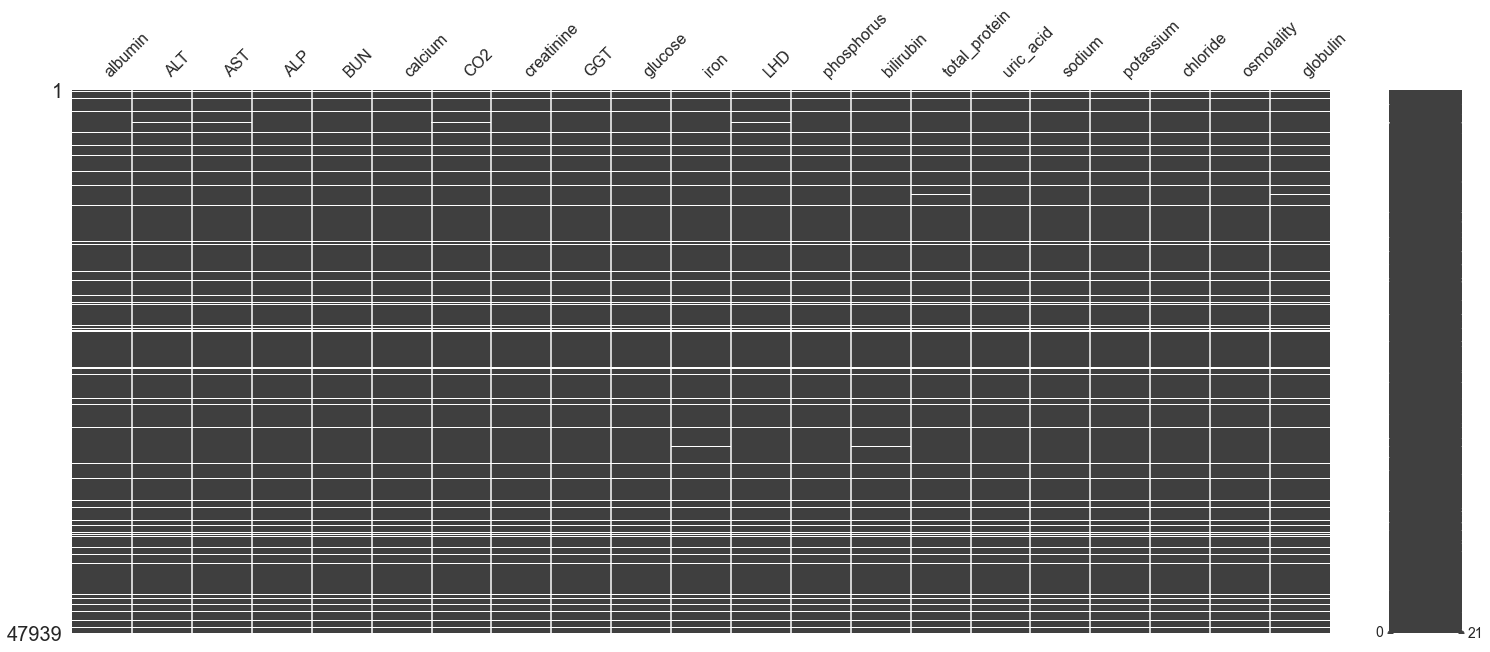

In [225]:
ms.matrix(biochem_clean);

In [226]:
val_counts(biochem_clean)

albumin value counts 



4.300    5252
4.200    5152
4.400    4905
4.100    4541
4.500    4295
4.000    3674
nan      3578
4.600    3238
3.900    2718
4.700    2242
3.800    1909
4.800    1417
3.700    1180
3.600     772
4.900     771
3.500     467
5.000     439
3.400     298
5.100     200
3.300     183
3.200     145
3.100     120
3.000     106
5.200     104
2.900      62
2.800      46
5.300      39
2.700      29
2.600      22
5.400      12
2.500       6
2.400       5
2.300       3
5.500       3
5.600       2
2.100       2
1.200       1
2.000       1
Name: albumin, dtype: int64

--------------------------------------
ALT value counts 



nan         3678
15.000      2704
16.000      2667
17.000      2596
14.000      2564
18.000      2420
19.000      2357
13.000      2233
20.000      2043
21.000      1934
12.000      1730
22.000      1657
23.000      1500
24.000      1373
11.000      1255
25.000      1219
26.000      1093
27.000       946
28.000       885
10.000       811
29.000       778
30.000       650
31.000       615
32.000       550
33.000       473
9.000        471
34.000       447
35.000       387
37.000       374
36.000       355
38.000       329
39.000       280
40.000       265
8.000        257
41.000       220
42.000       215
43.000       195
44.000       180
46.000       177
47.000       153
48.000       152
49.000       143
45.000       138
7.000        123
50.000       114
52.000        98
54.000        96
53.000        93
51.000        86
56.000        82
57.000        78
58.000        77
55.000        72
61.000        65
59.000        64
63.000        63
62.000        56
64.000        55
6.000         

--------------------------------------
AST value counts 



nan         3702
21.000      3295
20.000      3220
22.000      3147
19.000      3085
23.000      2967
18.000      2769
24.000      2585
25.000      2324
17.000      2283
26.000      2035
27.000      1686
16.000      1682
28.000      1503
29.000      1265
15.000      1158
30.000      1002
31.000       843
14.000       740
32.000       666
33.000       576
34.000       498
13.000       424
35.000       418
36.000       368
37.000       299
38.000       280
12.000       223
39.000       212
40.000       193
42.000       167
41.000       160
43.000       145
44.000       119
45.000       117
11.000       110
48.000       102
46.000        97
49.000        83
47.000        79
52.000        59
50.000        59
51.000        55
10.000        54
54.000        50
53.000        47
58.000        46
55.000        44
59.000        44
56.000        40
57.000        33
60.000        30
61.000        29
64.000        28
62.000        24
63.000        22
72.000        21
67.000        20
74.000        

--------------------------------------
ALP value counts 



nan        3587
65.000      861
61.000      859
63.000      834
59.000      822
62.000      820
66.000      815
67.000      813
64.000      811
58.000      806
55.000      799
60.000      797
56.000      791
69.000      790
70.000      788
68.000      766
57.000      758
71.000      753
54.000      745
72.000      739
51.000      735
73.000      731
74.000      719
52.000      694
75.000      678
53.000      670
76.000      660
79.000      629
49.000      626
48.000      621
50.000      619
77.000      618
80.000      571
81.000      571
78.000      560
82.000      529
47.000      526
84.000      516
83.000      510
46.000      470
45.000      468
86.000      468
85.000      466
44.000      439
87.000      439
88.000      412
90.000      406
89.000      402
43.000      387
92.000      369
91.000      351
42.000      330
95.000      319
41.000      318
93.000      317
94.000      308
96.000      301
99.000      284
97.000      283
40.000      273
100.000     258
98.000      252
38.000  

--------------------------------------
BUN value counts 



11.000    4289
12.000    4133
10.000    4030
13.000    3811
9.000     3726
nan       3586
14.000    3214
8.000     2903
15.000    2782
16.000    2294
7.000     2078
17.000    1766
18.000    1390
6.000     1325
19.000    1100
20.000     874
5.000      715
21.000     645
22.000     555
23.000     395
4.000      318
24.000     288
25.000     226
26.000     208
27.000     160
3.000      131
28.000     117
30.000      95
29.000      90
31.000      72
32.000      69
34.000      58
33.000      47
2.000       38
36.000      36
35.000      32
37.000      31
39.000      30
38.000      26
44.000      24
40.000      21
42.000      20
45.000      14
41.000      14
43.000      13
47.000      12
49.000      12
46.000      11
48.000      10
55.000      10
50.000       9
54.000       8
63.000       8
56.000       7
1.000        6
52.000       6
57.000       5
59.000       4
65.000       4
51.000       4
53.000       4
61.000       3
73.000       3
64.000       3
69.000       2
95.000       2
60.000    

--------------------------------------
calcium value counts 



9.400     5131
9.500     4877
9.300     4640
9.600     4531
9.200     4078
9.700     3702
nan       3627
9.100     3232
9.800     2784
9.000     2324
9.900     1933
8.900     1530
10.000    1316
8.800      971
10.100     795
8.700      567
10.200     508
8.600      331
10.300     275
10.400     160
8.500      151
10.500      88
8.400       73
10.600      55
8.300       45
10.700      44
10.800      33
10.900      25
8.100       15
8.200       15
11.100      12
11.000      12
8.000       10
7.900        8
11.200       4
11.500       4
11.300       4
7.800        3
6.900        3
11.400       3
7.600        2
12.000       2
7.200        2
7.300        2
7.700        2
12.100       2
7.500        1
7.000        1
6.400        1
6.500        1
6.600        1
12.700       1
11.700       1
14.800       1
Name: calcium, dtype: int64

--------------------------------------
CO2 value counts 



25.000    8080
26.000    7390
24.000    7107
27.000    5452
23.000    5046
nan       3670
28.000    3142
22.000    2995
21.000    1525
29.000    1448
20.000     660
30.000     602
19.000     312
31.000     180
18.000     115
32.000      81
33.000      35
17.000      33
16.000      19
34.000      17
35.000      11
15.000       5
38.000       5
37.000       4
40.000       1
14.000       1
13.000       1
43.000       1
10.000       1
Name: CO2, dtype: int64

--------------------------------------
creatinine value counts 



nan       3582
0.800     1898
0.700     1686
0.900     1675
1.000     1238
0.720     1224
0.820     1200
0.600     1159
0.920      992
0.620      948
1.100      829
1.020      686
0.740      674
0.690      658
0.840      648
0.730      646
0.780      641
0.810      639
0.790      638
0.770      637
0.760      629
0.710      629
0.750      624
0.860      613
0.850      612
0.680      608
0.830      607
0.670      594
0.650      594
0.910      587
0.660      571
0.880      571
0.640      558
0.890      555
0.870      526
0.940      526
0.930      525
0.610      478
0.520      475
0.630      458
0.950      457
1.200      455
0.960      454
0.990      447
0.500      440
0.980      434
0.970      421
0.580      414
0.570      400
0.590      393
1.010      392
1.120      381
1.040      342
0.560      327
1.030      325
0.550      322
1.050      312
1.060      302
1.070      290
0.540      259
1.110      247
1.080      242
0.530      233
1.090      225
1.140      220
1.300      220
0.510     

--------------------------------------
GGT value counts 



nan         3588
13.000      2352
12.000      2318
14.000      2295
15.000      2266
11.000      2090
16.000      2013
17.000      1933
10.000      1816
18.000      1793
19.000      1632
9.000       1498
20.000      1489
21.000      1319
22.000      1279
23.000      1137
8.000       1052
24.000      1000
25.000       926
26.000       847
27.000       766
28.000       707
29.000       639
7.000        638
30.000       550
31.000       522
33.000       477
32.000       477
34.000       410
35.000       386
36.000       366
6.000        352
37.000       340
38.000       300
39.000       284
40.000       274
42.000       258
41.000       254
5.000        208
44.000       208
43.000       206
45.000       193
46.000       166
50.000       155
49.000       150
48.000       139
47.000       137
52.000       134
54.000       120
51.000       118
56.000       116
53.000       107
55.000       103
59.000        94
62.000        92
60.000        85
57.000        85
58.000        84
64.000        

--------------------------------------
glucose value counts 



nan        3581
89.000     1642
88.000     1624
90.000     1598
91.000     1564
87.000     1552
92.000     1536
86.000     1500
85.000     1453
93.000     1411
84.000     1349
94.000     1331
95.000     1274
83.000     1250
82.000     1153
96.000     1099
81.000     1070
98.000      999
97.000      989
80.000      891
99.000      889
100.000     855
79.000      824
101.000     716
78.000      676
102.000     672
103.000     612
104.000     569
77.000      561
105.000     507
76.000      460
106.000     439
75.000      417
107.000     400
109.000     377
108.000     353
74.000      333
110.000     313
73.000      303
111.000     296
112.000     274
72.000      256
113.000     247
114.000     231
116.000     212
71.000      202
119.000     199
118.000     196
115.000     190
70.000      182
117.000     176
123.000     166
120.000     155
121.000     146
122.000     137
126.000     136
69.000      135
124.000     126
68.000      119
125.000     118
127.000     111
67.000      110
66.000  

--------------------------------------
iron value counts 



nan        3628
68.000      588
76.000      582
67.000      577
63.000      573
71.000      561
79.000      561
72.000      554
69.000      553
73.000      551
75.000      550
87.000      546
77.000      545
78.000      544
66.000      544
74.000      541
84.000      536
64.000      534
81.000      528
80.000      527
83.000      516
61.000      515
82.000      506
89.000      505
65.000      503
62.000      502
70.000      501
86.000      498
88.000      487
58.000      487
91.000      482
93.000      480
57.000      477
85.000      475
59.000      471
60.000      468
92.000      461
90.000      456
56.000      452
54.000      446
96.000      431
95.000      431
94.000      422
55.000      420
53.000      420
50.000      417
97.000      412
98.000      411
52.000      410
99.000      401
102.000     398
51.000      397
100.000     394
101.000     393
103.000     384
104.000     373
105.000     364
48.000      364
106.000     341
49.000      340
110.000     340
47.000      337
45.000  

--------------------------------------
LHD value counts 



nan         3811
121.000      760
120.000      747
122.000      736
123.000      721
119.000      702
125.000      690
131.000      690
126.000      686
129.000      677
118.000      675
134.000      671
124.000      663
117.000      660
128.000      651
130.000      645
115.000      644
127.000      643
133.000      639
114.000      636
116.000      632
132.000      631
136.000      614
112.000      612
111.000      605
135.000      598
137.000      591
113.000      591
139.000      590
108.000      589
140.000      579
110.000      549
141.000      545
109.000      543
144.000      541
138.000      537
107.000      535
142.000      516
106.000      509
145.000      509
143.000      508
105.000      507
147.000      495
148.000      490
150.000      465
146.000      457
104.000      450
102.000      449
103.000      431
149.000      412
152.000      400
101.000      400
154.000      397
151.000      390
100.000      379
98.000       374
156.000      355
155.000      353
153.000      3

--------------------------------------
phosphorus value counts 



nan       3589
3.700     3003
3.800     2997
3.600     2938
3.900     2876
4.000     2726
3.500     2720
3.400     2495
4.100     2472
4.200     2191
3.300     2149
4.300     1915
4.400     1733
3.200     1721
3.100     1456
4.500     1335
3.000     1142
4.600     1124
2.900      906
4.700      898
4.800      719
2.800      657
4.900      617
5.000      489
2.700      438
5.100      385
2.600      304
5.200      293
5.300      259
2.500      207
5.400      193
5.500      152
2.400      128
5.600      125
5.700      105
2.300       80
5.800       58
2.200       52
6.000       49
5.900       48
6.100       36
2.100       27
6.300       22
2.000       17
6.200       13
6.400       12
6.500       11
1.900       10
6.600        9
1.800        9
6.700        7
6.800        2
1.700        2
7.200        2
8.100        2
7.500        2
1.000        1
9.600        1
7.600        1
10.900       1
8.200        1
8.900        1
7.100        1
6.900        1
1.600        1
9.700        1
3.560     

--------------------------------------
bilirubin value counts 



0.600     7162
0.500     6868
0.700     6066
0.400     5206
0.800     4641
nan       3605
0.300     3274
0.900     2985
1.000     2013
0.200     1726
1.100     1232
1.200      849
1.300      523
1.400      376
0.100      366
1.500      255
1.600      166
1.700      141
1.800       93
1.900       83
2.200       41
2.000       41
2.300       35
2.100       30
0.000       27
2.400       21
2.600       15
2.900       10
2.500       10
2.700        8
2.800        7
0.010        7
0.090        6
0.050        5
0.080        4
0.070        4
0.020        4
3.200        3
0.060        3
3.300        3
4.000        2
0.040        2
3.600        2
3.100        2
0.250        1
0.270        1
0.420        1
0.850        1
0.340        1
7.300        1
3.900        1
0.320        1
3.000        1
4.400        1
3.400        1
7.100        1
13.100       1
3.500        1
3.700        1
4.100        1
0.030        1
Name: bilirubin, dtype: int64

--------------------------------------
total_protein value counts 



7.200     4055
7.100     3895
7.000     3760
7.300     3724
nan       3636
6.900     3356
7.400     3346
7.500     2929
6.800     2831
7.600     2416
6.700     2216
7.700     1839
6.600     1790
7.800     1352
6.500     1256
7.900      952
6.400      874
8.000      691
6.300      624
8.100      459
6.200      386
8.200      312
6.100      243
8.300      204
6.000      122
8.400      121
5.900       95
8.500       85
5.800       77
8.600       50
8.700       39
5.700       37
5.600       33
5.500       23
8.800       20
5.300       13
8.900       12
9.000       11
9.100       11
5.400        8
9.300        5
5.200        4
9.200        4
10.100       3
9.500        3
4.700        2
9.400        2
10.200       1
10.400       1
5.380        1
10.300       1
11.300       1
3.400        1
10.900       1
5.100        1
10.800       1
9.700        1
10.000       1
9.900        1
4.900        1
Name: total_protein, dtype: int64

--------------------------------------
uric_acid value counts 



nan       3592
5.200     1275
4.600     1275
5.300     1264
4.900     1257
5.500     1226
5.000     1224
4.700     1223
4.800     1220
4.400     1213
5.400     1209
5.100     1174
5.600     1154
5.700     1136
4.500     1132
4.200     1107
4.300     1094
5.800     1083
5.900     1080
6.000     1040
4.100     1013
4.000     1001
6.100      949
6.200      911
3.900      889
6.300      872
3.800      851
3.700      827
6.400      799
6.500      797
3.600      733
6.700      720
6.600      716
3.500      644
6.900      616
6.800      615
3.400      595
7.000      561
7.100      503
3.300      503
7.200      480
7.300      441
3.200      411
7.400      370
7.500      349
3.100      331
7.600      309
7.700      284
7.800      282
2.900      272
3.000      268
7.900      246
8.000      210
2.800      199
8.100      183
8.200      178
2.700      158
8.300      156
8.400      150
8.500      124
8.700      106
2.600      104
8.800       99
8.600       98
8.900       79
2.500       76
9.000     

--------------------------------------
sodium value counts 



139.000    8502
140.000    8145
138.000    6626
141.000    6052
137.000    4135
nan        3582
142.000    3566
136.000    2151
143.000    1765
135.000    1035
144.000     805
134.000     436
145.000     361
133.000     236
146.000     131
132.000     113
131.000      70
147.000      55
130.000      43
129.000      30
148.000      22
128.000      16
127.000      12
124.000       7
149.000       6
150.000       5
125.000       4
151.000       4
126.000       3
121.000       2
120.000       2
154.000       2
119.000       2
160.000       2
123.000       2
155.000       1
161.000       1
153.000       1
102.000       1
107.000       1
114.000       1
157.000       1
99.000        1
117.000       1
Name: sodium, dtype: int64

--------------------------------------
potassium value counts 



3.900    4962
4.000    4912
4.100    4448
3.800    4430
nan      3591
4.200    3573
3.700    3406
4.300    2622
3.600    2318
4.400    1811
3.500    1507
4.500    1221
3.400     790
4.600     773
4.700     514
3.300     413
4.800     286
4.900     203
3.200     198
5.000     128
5.100     100
3.100      93
3.980      90
3.910      87
3.850      87
3.940      86
3.880      85
3.920      85
3.970      84
3.930      83
3.840      79
3.740      79
3.990      79
3.820      79
4.010      78
4.020      77
3.810      77
3.830      77
3.890      77
3.770      76
3.960      75
4.050      74
3.780      73
3.860      73
3.950      72
3.870      72
4.060      69
3.760      65
3.000      64
4.090      64
4.070      64
3.790      64
3.720      63
4.150      63
4.040      61
4.130      61
4.190      59
3.750      59
3.680      59
4.140      58
4.110      57
4.240      56
4.080      56
4.170      56
4.030      56
3.710      55
4.180      55
4.280      55
4.160      55
3.670      54
3.640      53
4.120 

--------------------------------------
chloride value counts 



104.000    6668
105.000    6140
103.000    5936
102.000    4824
106.000    4732
101.000    3663
nan        3583
107.000    3161
100.000    2393
108.000    1740
99.000     1580
98.000      880
109.000     759
97.000      531
110.000     338
96.000      291
95.000      189
111.000     128
94.000      121
93.000       57
112.000      48
92.000       44
91.000       25
113.000      24
90.000       20
114.000      11
89.000       10
87.000        7
115.000       6
88.000        6
86.000        4
117.000       3
84.000        3
118.000       3
116.000       3
119.000       2
73.000        1
70.000        1
83.000        1
120.000       1
79.000        1
82.000        1
Name: chloride, dtype: int64

--------------------------------------
osmolality value counts 



278.000    3931
277.000    3862
276.000    3642
279.000    3612
nan        3588
280.000    3336
275.000    3121
281.000    2822
274.000    2590
282.000    2467
283.000    2035
273.000    1952
272.000    1531
284.000    1530
285.000    1142
271.000    1082
286.000     902
270.000     721
287.000     655
288.000     501
269.000     485
289.000     343
268.000     317
290.000     289
267.000     235
291.000     199
266.000     146
292.000     145
293.000      93
265.000      90
294.000      70
264.000      56
295.000      53
296.000      40
263.000      39
297.000      38
261.000      35
262.000      34
298.000      30
260.000      23
301.000      16
299.000      14
300.000      13
302.000      11
258.000      10
259.000      10
257.000       8
256.000       8
304.000       8
306.000       5
303.000       5
250.000       4
255.000       4
246.000       3
252.000       3
313.000       2
249.000       2
308.000       2
248.000       2
305.000       2
254.000       2
315.000       2
307.000 

--------------------------------------
globulin value counts 



2.800    4403
2.900    4172
2.700    4062
3.000    3907
nan      3637
2.600    3533
3.100    3453
2.500    2958
3.200    2860
3.300    2364
2.400    2258
3.400    1876
2.300    1515
3.500    1413
3.600    1023
2.200     983
3.700     688
2.100     521
3.800     490
3.900     370
2.000     278
4.000     241
4.100     153
4.200     135
1.900     132
4.300     104
1.800      77
4.400      57
4.500      51
4.600      42
4.700      28
1.700      26
4.800      16
1.600      13
4.900      13
5.000      11
5.200       9
5.500       7
1.500       6
5.400       6
5.300       6
6.000       5
1.400       4
1.000       4
1.300       4
6.200       3
1.200       2
5.900       2
5.100       2
6.500       2
5.700       2
7.000       1
7.200       1
6.300       1
5.800       1
5.600       1
7.100       1
6.700       1
6.600       1
0.800       1
7.500       1
0.700       1
0.600       1
Name: globulin, dtype: int64

--------------------------------------


In [227]:
biochem_clean.fillna(0, inplace=True)

In [228]:
int_cols = ['ALT', 'AST', 'ALP', 'BUN', 'CO2', 'GGT', 'glucose', 'iron', 'LHD', 
            'sodium', 'chloride', 'osmolality']
for col in int_cols:
    biochem_clean[col] = biochem_clean[col].astype('int64')

In [247]:
biochem_clean.isna().sum()

albumin          0
ALT              0
AST              0
ALP              0
BUN              0
calcium          0
CO2              0
creatinine       0
GGT              0
glucose          0
iron             0
LHD              0
phosphorus       0
bilirubin        0
total_protein    0
uric_acid        0
sodium           0
potassium        0
chloride         0
osmolality       0
globulin         0
dtype: int64

In [230]:
biochem_clean.head()

,albumin,ALT,AST,ALP,BUN,calcium,CO2,creatinine,GGT,glucose,iron,LHD,phosphorus,bilirubin,total_protein,uric_acid,sodium,potassium,chloride,osmolality,globulin
SEQN,,,,,,,,,,,,,,,,,,,,,
31129,4.300,25,25,88,10,9.700,24,1.000,34,78,46,149,4.800,0.600,7.000,6.700,141,4.200,106,279,2.700
31130,0.000,0,0,0,0,0.000,0,0.000,0,0,0,0,0.000,0.000,0.000,0.000,0,0.000,0,0,0.000
31131,3.500,14,16,74,6,8.900,23,0.800,17,87,51,105,3.400,0.400,6.900,4.900,137,4.100,106,271,3.400
31132,5.000,31,29,48,25,9.900,29,1.200,22,155,89,165,3.400,1.000,7.200,7.200,140,3.800,102,287,2.200
31133,4.200,15,21,41,7,9.800,23,0.900,27,79,55,101,4.000,1.800,7.800,4.700,137,4.000,102,271,3.600


# Blood Count

In [231]:
path = r'Data/BloodCount'
df_count = glob_concat(path, '*.XPT')

['Data/BloodCount\\CBC_D.XPT',
 'Data/BloodCount\\CBC_E.XPT',
 'Data/BloodCount\\CBC_F.XPT',
 'Data/BloodCount\\CBC_G.XPT',
 'Data/BloodCount\\CBC_H.XPT',
 'Data/BloodCount\\CBC_I.XPT',
 'Data/BloodCount\\CBC_J.XPT']

In [232]:
df_count.head()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC
0,31128.000,5.000,45.300,8.600,44.300,1.800,0.100,2.300,0.400,2.200,0.100,0.000,5.250,13.700,41.400,78.800,26.100,33.100,12.600,286.000,8.100,nan
1,31129.000,8.200,15.200,12.700,59.900,11.900,0.300,1.200,1.000,4.900,1.000,0.000,4.780,14.100,41.500,86.900,29.500,34.000,12.400,214.000,8.900,nan
2,31130.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,31131.000,5.300,35.800,7.800,55.100,0.900,0.500,1.900,0.400,2.900,0.000,0.000,4.630,12.500,37.100,80.100,27.100,33.800,13.700,298.000,7.800,nan
4,31132.000,7.500,29.400,9.100,58.900,2.200,0.400,2.200,0.700,4.400,0.200,0.000,4.720,14.500,42.600,90.300,30.700,34.000,12.500,225.000,8.600,nan


In [233]:
df_count.SEQN = df_count.SEQN.astype('int64')
df_count.set_index('SEQN', verify_integrity=True, inplace=True)

In [234]:
df_count.head()

,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC
SEQN,,,,,,,,,,,,,,,,,,,,,
31128,5.000,45.300,8.600,44.300,1.800,0.100,2.300,0.400,2.200,0.100,0.000,5.250,13.700,41.400,78.800,26.100,33.100,12.600,286.000,8.100,nan
31129,8.200,15.200,12.700,59.900,11.900,0.300,1.200,1.000,4.900,1.000,0.000,4.780,14.100,41.500,86.900,29.500,34.000,12.400,214.000,8.900,nan
31130,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,5.300,35.800,7.800,55.100,0.900,0.500,1.900,0.400,2.900,0.000,0.000,4.630,12.500,37.100,80.100,27.100,33.800,13.700,298.000,7.800,nan
31132,7.500,29.400,9.100,58.900,2.200,0.400,2.200,0.700,4.400,0.200,0.000,4.720,14.500,42.600,90.300,30.700,34.000,12.500,225.000,8.600,nan


In [235]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64491 entries, 31128 to 102956
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXWBCSI  57606 non-null  float64
 1   LBXLYPCT  57517 non-null  float64
 2   LBXMOPCT  57517 non-null  float64
 3   LBXNEPCT  57517 non-null  float64
 4   LBXEOPCT  57517 non-null  float64
 5   LBXBAPCT  57517 non-null  float64
 6   LBDLYMNO  57515 non-null  float64
 7   LBDMONO   57515 non-null  float64
 8   LBDNENO   57515 non-null  float64
 9   LBDEONO   57515 non-null  float64
 10  LBDBANO   57515 non-null  float64
 11  LBXRBCSI  57608 non-null  float64
 12  LBXHGB    57608 non-null  float64
 13  LBXHCT    57608 non-null  float64
 14  LBXMCVSI  57608 non-null  float64
 15  LBXMCHSI  57608 non-null  float64
 16  LBXMC     57638 non-null  float64
 17  LBXRDW    57608 non-null  float64
 18  LBXPLTSI  57607 non-null  float64
 19  LBXMPSI   57607 non-null  float64
 20  LBXNRBC   7523 non-null

In [236]:
count_clean = df_count.drop(columns=['LBXNRBC'])

## Renaming Columns

In [237]:
count_clean.columns

Index(['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
       'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI',
       'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW',
       'LBXPLTSI', 'LBXMPSI'],
      dtype='object')

In [238]:
count_clean.rename(columns={'LBXWBCSI': 'white_BCC', 
                            'LBXLYPCT': 'lymphocyte_percent', 
                            'LBXMOPCT': 'monocyte_percent', 
                            'LBXNEPCT': 'neutrophils_percent', 
                            'LBXEOPCT': 'eosinophils_percent', 
                            'LBXBAPCT': 'basophils_percent',
                            'LBDLYMNO': 'lymphocyte_count', 
                            'LBDMONO': 'monocyte_count', 
                            'LBDNENO': 'neutrophils_count', 
                            'LBDEONO': 'eosinophils_count', 
                            'LBDBANO': 'basophils_count', 
                            'LBXRBCSI': 'RBC_count',
                            'LBXHGB': 'hemoglobin', 
                            'LBXHCT': 'hematocrit', 
                            'LBXMCVSI': 'MCV', 
                            'LBXMCHSI': 'MCH', 
                            'LBXMC': 'MCHC', 
                            'LBXRDW': 'RDW',
                            'LBXPLTSI': 'platelet_count', 
                            'LBXMPSI': 'MPV'
                            }, inplace=True)

In [239]:
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64491 entries, 31128 to 102956
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   white_BCC            57606 non-null  float64
 1   lymphocyte_percent   57517 non-null  float64
 2   monocyte_percent     57517 non-null  float64
 3   neutrophils_percent  57517 non-null  float64
 4   eosinophils_percent  57517 non-null  float64
 5   basophils_percent    57517 non-null  float64
 6   lymphocyte_count     57515 non-null  float64
 7   monocyte_count       57515 non-null  float64
 8   neutrophils_count    57515 non-null  float64
 9   eosinophils_count    57515 non-null  float64
 10  basophils_count      57515 non-null  float64
 11  RBC_count            57608 non-null  float64
 12  hemoglobin           57608 non-null  float64
 13  hematocrit           57608 non-null  float64
 14  MCV                  57608 non-null  float64
 15  MCH                  57608 non-

## Clean Column Values

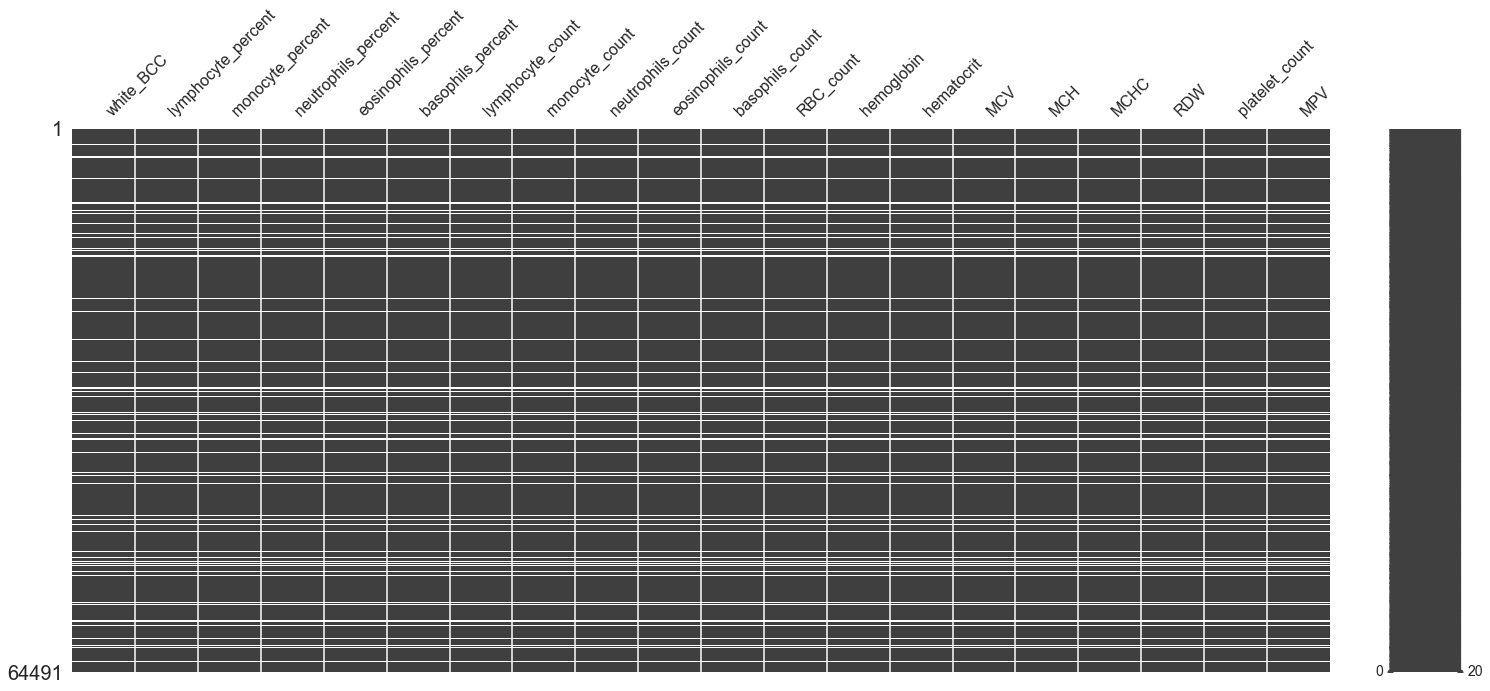

In [240]:
ms.matrix(count_clean);

In [241]:
val_counts(count_clean)

white_BCC value counts 



nan        6885
6.400      1575
6.100      1563
6.600      1539
6.900      1514
7.100      1455
5.900      1453
5.600      1380
7.600      1322
6.300      1237
5.100      1171
8.100      1164
6.800      1137
7.400      1126
7.300      1093
5.700      1068
5.500      1047
4.900      1016
8.400      1004
7.800       995
7.500       988
5.400       966
8.600       925
7.900       908
8.000       902
5.300       890
8.200       885
8.900       836
4.600       819
6.700       813
6.200       794
7.200       789
6.000       773
7.000       758
5.800       750
6.500       741
9.100       738
7.700       690
4.700       671
8.800       659
4.400       643
9.400       623
5.200       616
8.500       601
9.600       548
8.300       507
5.000       500
9.300       496
9.000       469
8.700       462
4.100       460
10.000      456
4.800       456
4.300       441
9.800       412
9.900       395
9.500       389
9.200       373
10.100      359
10.400      359
4.500       330
3.800       317
4.000   

--------------------------------------
lymphocyte_percent value counts 



nan       6974
28.800     347
29.000     342
31.300     336
34.200     330
33.300     324
27.000     324
32.300     320
26.500     315
29.500     313
32.800     312
32.000     306
31.500     301
35.300     301
30.000     293
34.800     289
37.300     289
26.300     285
36.700     283
33.800     280
27.500     279
35.800     276
29.800     274
32.500     271
28.300     270
30.800     266
27.800     263
31.100     261
26.700     261
30.600     259
30.300     257
24.000     256
28.500     252
25.800     250
29.200     247
34.000     247
27.300     244
33.600     243
30.500     242
39.200     242
31.700     241
25.000     240
28.600     237
36.300     237
32.700     237
31.200     237
30.700     234
34.700     233
28.100     233
38.300     233
32.200     232
31.000     232
27.700     231
28.700     230
30.200     230
30.400     230
23.800     229
37.800     228
34.500     226
35.600     226
24.500     224
25.600     224
36.800     223
34.300     222
37.000     220
28.200     217
35.000    

--------------------------------------
monocyte_percent value counts 



nan       6974
6.900     1508
8.100     1393
7.100     1347
7.600     1298
8.400     1209
8.600     1199
7.500     1169
7.900     1164
6.600     1158
6.400     1148
8.000     1141
7.300     1139
6.300     1134
7.400     1125
7.800     1117
6.800     1110
8.900     1085
6.100     1030
8.200     1025
7.200      997
7.700      970
9.100      933
8.800      929
5.900      928
6.700      899
9.400      856
5.600      854
8.500      845
9.000      790
7.000      776
9.600      770
6.200      759
10.000     753
9.300      736
5.700      709
8.300      702
6.500      687
5.800      658
9.500      644
8.700      616
5.500      586
9.800      584
5.400      570
9.900      559
6.000      558
9.200      543
10.400     529
5.300      527
5.100      511
10.100     509
10.600     486
10.200     459
4.900      432
5.200      413
9.700      412
10.500     405
4.700      397
11.000     372
4.600      342
10.900     324
10.800     321
4.400      300
4.800      300
11.200     293
10.300     288
11.400    

--------------------------------------
neutrophils_percent value counts 



nan       6974
57.800     293
59.300     290
56.800     289
57.200     288
59.700     287
61.300     286
58.800     281
61.800     271
60.300     268
60.900     266
54.300     262
51.300     258
52.200     258
52.800     251
51.800     251
59.900     251
57.400     248
62.800     246
56.300     245
53.800     244
57.000     242
58.000     240
62.200     240
55.900     238
55.300     238
55.500     236
54.900     233
49.700     232
55.700     231
54.700     231
58.200     230
58.400     228
56.200     228
63.800     226
50.900     226
55.200     223
53.200     222
59.500     222
55.800     222
53.000     221
53.900     220
58.700     220
54.200     220
53.400     219
51.400     218
54.100     218
52.700     216
60.100     215
56.100     215
50.300     214
48.800     214
57.600     213
59.100     212
56.600     209
49.300     208
60.700     208
64.900     207
52.400     207
54.500     207
64.300     207
55.100     206
60.500     206
62.000     205
58.900     205
53.700     204
62.400    

--------------------------------------
eosinophils_percent value counts 



nan       6974
1.700     2362
2.000     2140
1.300     2088
2.300     2027
1.600     1714
1.500     1696
2.800     1668
2.200     1591
0.900     1578
1.200     1573
2.500     1532
1.000     1514
1.800     1500
1.900     1412
2.700     1274
1.400     1247
3.400     1134
2.100     1086
0.800     1079
3.100     1060
2.400     1053
2.600     1028
3.000     1014
3.200      992
1.100      985
3.800      961
0.600      916
2.900      897
3.300      878
3.500      723
3.700      723
4.100      660
4.400      629
3.600      591
3.900      569
4.000      563
0.700      549
4.300      543
4.700      494
4.200      490
4.600      479
4.900      427
5.100      426
0.400      426
5.600      339
4.800      332
5.300      331
0.500      325
5.200      298
5.400      276
4.500      269
5.500      267
5.700      249
5.900      244
5.000      242
6.400      235
6.300      229
6.100      219
5.800      218
0.300      202
6.600      198
6.900      177
7.100      168
6.000      162
6.200      154
6.800     

--------------------------------------
basophils_percent value counts 



0.600     9839
0.400     7160
nan       6974
0.800     5822
0.500     5209
0.900     5173
0.700     4709
0.300     3868
1.000     3135
0.200     2361
1.200     1665
1.100     1627
0.100     1481
1.300     1207
0.000      872
1.400      597
1.500      445
1.700      380
1.600      380
2.000      207
1.900      169
1.800      153
2.300      138
2.500       91
2.200       86
2.100       78
2.800       75
2.400       60
2.700       45
3.100       44
2.600       40
3.400       36
3.000       34
3.300       29
2.900       27
3.200       23
3.600       21
3.500       19
3.700       19
3.800       19
4.000       18
3.900       13
4.200       12
4.400       11
4.600       10
4.300        9
4.100        9
5.100        8
4.900        7
4.500        7
6.300        5
4.700        5
6.100        5
5.500        4
5.300        4
4.800        3
6.200        3
7.500        2
6.800        2
5.200        2
8.400        2
5.700        2
5.900        2
5.400        2
8.300        1
5.600        1
6.400     

--------------------------------------
lymphocyte_count value counts 



nan        6976
1.900      3239
2.000      3196
1.800      3109
2.100      3098
2.200      3037
2.300      2943
1.700      2882
2.400      2698
1.600      2550
2.500      2484
2.600      2347
1.500      2122
2.700      2023
2.800      1862
1.400      1745
2.900      1643
1.300      1383
3.000      1373
3.100      1294
3.200      1116
1.200      1017
3.300       962
3.400       857
1.100       765
3.500       744
3.600       614
3.700       575
1.000       507
3.800       466
3.900       446
4.000       357
0.900       316
4.200       306
4.100       297
4.300       249
4.400       236
4.500       209
0.800       196
4.700       195
4.600       167
4.800       122
4.900       119
0.700       117
5.000       100
5.200        98
5.300        96
5.100        92
5.500        83
5.400        70
5.600        69
5.700        68
0.600        66
5.800        53
5.900        49
6.100        45
6.300        45
6.200        43
6.500        41
6.000        40
6.400        37
0.500        33
6.600   

--------------------------------------
monocyte_count value counts 



0.500     13469
0.600     11387
0.400     10965
0.700      7259
nan        6976
0.300      4739
0.800      4132
0.900      2282
1.000      1154
0.200       749
1.100       558
1.200       304
1.300       153
1.400        96
1.500        79
0.100        56
1.600        40
1.700        29
1.800        18
1.900        10
2.000         5
2.600         4
2.400         4
2.900         3
2.100         3
2.300         2
2.500         2
0.000         2
3.600         1
4.300         1
3.200         1
2.700         1
2.200         1
6.700         1
10.200        1
3.800         1
3.400         1
5.500         1
2.800         1
Name: monocyte_count, dtype: int64

--------------------------------------
neutrophils_count value counts 



nan       6976
3.200     1640
3.700     1560
3.000     1555
3.600     1555
3.500     1542
3.400     1537
3.300     1530
3.100     1505
3.800     1495
3.900     1480
4.000     1461
2.900     1448
2.800     1437
2.700     1419
4.100     1380
2.600     1359
4.200     1307
4.300     1293
2.500     1244
4.400     1235
4.500     1163
4.600     1145
2.400     1138
2.300     1094
4.700     1061
4.800     1029
4.900      956
2.200      946
5.000      929
2.100      918
5.200      832
2.000      821
5.100      813
5.400      747
1.900      737
5.300      736
5.500      704
5.600      691
1.800      657
5.700      572
1.700      568
5.800      562
1.600      477
6.000      470
5.900      466
6.100      455
6.200      424
1.500      416
6.300      377
6.400      376
1.400      345
6.600      343
6.500      341
6.700      293
6.900      265
7.000      258
1.300      253
6.800      250
7.100      238
1.200      223
7.200      201
7.300      179
7.400      173
7.500      157
7.600      155
1.100     

--------------------------------------
eosinophils_count value counts 



0.100    22337
0.200    16043
0.300     7717
nan       6976
0.400     3768
0.000     2821
0.500     1949
0.600     1120
0.700      570
0.800      372
0.900      248
1.000      167
1.100      102
1.200       75
1.300       50
1.400       41
1.600       35
1.500       29
1.700       13
1.800        9
2.300        7
2.100        7
1.900        6
2.200        5
2.000        5
3.100        3
2.600        2
8.400        1
2.900        1
3.700        1
3.000        1
4.300        1
3.200        1
2.500        1
4.900        1
3.600        1
2.700        1
4.500        1
2.800        1
3.800        1
2.400        1
Name: eosinophils_count, dtype: int64

--------------------------------------
basophils_count value counts 



0.000    33766
0.100    22561
nan       6976
0.200      866
0.300      200
0.400       61
0.500       22
0.600       14
0.700        6
1.000        5
0.900        4
0.800        3
1.400        2
4.700        1
2.100        1
2.000        1
1.300        1
1.700        1
Name: basophils_count, dtype: int64

--------------------------------------
RBC_count value counts 



nan      6883
4.640     692
4.610     685
4.530     682
4.470     666
4.570     661
4.680     643
4.820     619
4.720     618
4.430     611
4.390     597
4.360     581
4.860     574
4.590     570
4.890     566
4.780     553
4.490     546
4.320     545
4.510     542
4.930     536
4.740     529
4.690     520
4.450     519
4.280     518
4.560     515
4.600     511
4.650     504
4.660     501
4.970     501
4.630     493
4.550     490
4.760     483
4.730     480
4.700     473
4.480     471
4.400     466
4.520     462
4.440     454
4.380     454
4.220     452
5.030     447
4.410     436
4.340     434
4.850     432
5.110     427
4.770     423
4.840     420
4.350     417
4.880     417
4.800     417
4.910     413
5.010     412
4.260     410
5.070     410
4.900     406
4.310     400
4.300     398
4.810     394
4.990     394
4.180     389
4.240     381
4.950     378
5.140     373
4.540     369
4.670     365
4.940     362
4.980     361
4.270     355
4.750     347
4.140     345
5.180     343
5.060 

--------------------------------------
hemoglobin value counts 



nan       6883
13.100    2071
12.900    1913
13.900    1898
14.100    1676
13.300    1661
13.500    1652
13.400    1608
12.500    1579
13.800    1520
13.600    1502
13.700    1495
12.700    1439
12.600    1382
14.300    1329
15.000    1303
14.400    1229
14.500    1214
13.000    1128
12.400    1127
15.400    1120
14.700    1107
14.800    1087
14.600    1075
14.900    1070
13.200    1068
12.300    1032
12.200    1027
14.000    1017
12.800    1004
15.600     983
15.100     918
14.200     898
15.200     892
12.100     819
12.000     787
16.000     727
15.800     698
11.900     677
11.600     646
15.900     626
15.500     621
11.800     586
16.300     549
15.300     533
16.200     487
15.700     467
11.400     458
16.500     422
11.700     392
11.500     327
11.300     320
16.100     310
11.200     279
16.800     271
16.400     244
16.700     219
11.100     214
17.000     209
11.000     186
16.600     167
10.900     161
10.600     149
10.800     147
10.400     131
16.900     122
17.300    

--------------------------------------
hematocrit value counts 



nan       6883
39.800     749
38.300     713
39.200     704
40.300     693
38.800     688
37.800     683
37.300     635
41.300     633
39.500     613
36.700     607
41.800     595
39.000     579
40.900     564
39.700     554
38.600     549
42.200     547
38.700     537
38.200     537
37.700     535
40.100     534
39.300     528
40.700     522
42.800     520
40.800     520
40.500     519
40.200     519
36.300     516
37.500     515
37.000     512
41.200     504
38.100     501
43.800     499
42.400     498
43.400     481
37.200     463
41.100     460
41.600     460
38.500     459
38.000     458
44.700     455
39.100     454
42.000     452
41.400     450
40.000     449
42.700     446
38.900     445
44.300     442
36.800     442
41.700     440
43.000     438
35.800     430
36.500     428
39.900     422
41.000     415
39.400     413
45.300     412
37.600     407
40.400     406
42.600     405
37.900     403
37.400     403
38.400     402
40.600     401
43.200     398
43.300     396
39.600    

--------------------------------------
MCV value counts 



nan        6883
88.900      546
86.900      545
89.400      544
86.600      532
89.100      503
87.800      501
86.400      501
88.200      498
89.800      490
88.600      487
90.700      464
90.100      461
87.300      461
87.600      460
91.600      460
90.300      454
87.100      454
89.600      452
91.400      450
88.100      434
85.600      428
83.900      421
91.900      421
90.600      415
88.800      415
85.700      415
87.400      414
88.500      411
89.900      411
84.100      409
84.400      407
89.300      406
86.300      403
90.500      403
85.300      399
86.100      396
92.300      393
88.000      392
85.100      388
88.400      387
91.100      386
84.600      385
86.000      384
84.900      382
84.800      378
86.800      377
90.900      374
91.300      371
87.700      366
91.000      366
85.500      359
87.200      359
85.900      351
90.200      349
92.400      347
92.800      345
88.700      335
92.100      333
83.100      329
86.200      329
83.200      329
92.600  

--------------------------------------
MCH value counts 



nan       6883
30.000    1475
29.500    1377
31.300    1281
29.800    1266
29.000    1238
30.300    1216
30.800    1208
28.800    1190
29.200    1145
31.500    1115
30.200    1053
30.500    1045
30.700    1038
30.600    1001
31.000     978
31.100     948
31.200     924
30.400     912
28.700     896
31.700     893
29.600     884
29.900     875
29.700     868
29.300     864
30.900     854
28.500     832
28.600     823
28.300     814
29.100     810
29.400     788
32.000     759
27.500     753
28.200     751
32.300     720
27.800     711
30.100     709
28.100     680
28.000     671
28.400     650
28.900     632
27.700     631
31.600     629
31.900     592
27.900     584
27.300     576
31.800     553
27.000     541
32.800     540
31.400     511
32.200     511
32.500     506
27.400     420
27.200     418
26.700     416
27.600     401
26.500     396
32.700     395
27.100     389
32.400     385
26.300     351
26.800     349
26.900     338
32.100     333
33.300     326
33.200     298
32.600    

--------------------------------------
MCHC value counts 



nan       6853
34.200    3136
33.800    3085
34.000    2523
33.300    2434
34.800    2318
33.700    2222
33.600    2203
34.500    2197
34.300    2156
33.900    1858
33.500    1837
34.100    1809
34.700    1777
33.400    1732
33.200    1687
33.100    1577
34.400    1564
32.800    1448
35.000    1408
34.600    1348
35.300    1255
33.000    1221
32.900    1077
34.900    1069
35.200    1035
32.700     971
35.100     888
32.500     798
32.600     769
32.300     738
32.400     562
35.400     545
35.600     524
35.500     507
35.800     499
32.200     465
35.700     459
32.000     395
32.100     333
31.800     268
31.900     264
31.500     224
31.700     218
35.900     196
36.000     193
31.600     183
36.100     182
36.300     162
36.200     156
31.300     131
31.400     100
31.200      91
31.100      81
36.500      70
36.400      64
31.000      60
36.700      51
30.900      46
36.600      39
30.800      39
30.700      39
30.600      33
36.800      30
30.500      29
30.300      22
37.000    

--------------------------------------
RDW value counts 



nan       6883
12.500    3408
12.900    3138
13.100    2859
12.600    2461
12.700    2433
12.400    2320
13.300    2226
13.000    2203
12.300    2175
12.200    2114
13.500    1996
13.400    1970
12.000    1806
12.800    1694
12.100    1626
13.200    1579
13.600    1498
13.700    1478
13.900    1436
13.800    1393
11.900    1378
14.100    1126
11.800    1062
11.600     972
14.000     961
14.300     736
14.400     633
14.200     622
14.500     619
11.700     492
14.700     478
11.400     478
14.600     442
15.000     407
14.800     405
11.500     386
14.900     378
15.100     279
15.200     251
15.600     226
15.400     219
15.500     198
11.300     196
15.300     182
15.800     152
16.000     149
15.900     142
16.200     125
11.200     123
15.700     122
16.500     101
16.400      98
16.100      89
16.300      84
16.600      76
16.800      73
16.900      64
17.000      64
11.100      61
17.500      60
11.000      59
16.700      59
17.400      58
17.200      51
17.300      50
17.700    

--------------------------------------
platelet_count value counts 



nan         6884
239.000      396
248.000      384
226.000      383
235.000      382
265.000      380
220.000      380
242.000      379
260.000      377
237.000      375
241.000      372
251.000      369
257.000      364
233.000      364
230.000      364
231.000      362
258.000      360
236.000      359
229.000      358
225.000      357
232.000      357
228.000      355
243.000      353
246.000      348
249.000      347
262.000      345
240.000      345
256.000      344
224.000      343
223.000      341
274.000      341
247.000      341
264.000      340
214.000      340
263.000      340
261.000      338
244.000      337
266.000      336
271.000      335
211.000      333
250.000      332
255.000      332
215.000      331
234.000      330
254.000      330
253.000      328
212.000      327
238.000      327
267.000      325
259.000      325
222.000      323
218.000      321
278.000      320
245.000      318
219.000      318
287.000      317
216.000      317
252.000      317
281.000      3

--------------------------------------
MPV value counts 



nan       6884
8.100     3258
7.600     3158
8.400     2638
7.800     2571
7.900     2561
8.000     2518
7.500     2352
8.200     2349
7.100     2267
7.400     2240
8.600     2177
7.300     2103
6.900     1866
7.700     1837
8.900     1652
8.500     1566
8.800     1538
8.300     1465
7.200     1388
9.100     1296
6.800     1126
8.700     1096
6.600     1027
9.000     1018
7.000     1010
9.400      866
9.300      857
6.700      694
6.400      692
9.600      678
9.200      659
9.500      520
9.800      409
6.500      377
6.300      364
10.000     359
9.900      342
9.700      319
6.100      257
10.100     242
10.200     228
10.400     193
6.200      185
10.600     133
5.900      131
10.500     121
10.300     107
6.000       96
10.800      78
10.900      74
10.700      54
5.700       52
11.000      48
5.800       48
5.600       47
11.100      42
11.200      31
11.500      27
11.300      24
11.400      24
5.500       22
11.600      17
5.400       15
11.800      15
11.900      12
12.000    

--------------------------------------


In [242]:
count_clean.fillna(0, inplace=True)

In [243]:
count_clean['platelet_count'] = count_clean['platelet_count'].astype('int64')

In [248]:
count_clean.isna().sum()

white_BCC              0
lymphocyte_percent     0
monocyte_percent       0
neutrophils_percent    0
eosinophils_percent    0
basophils_percent      0
lymphocyte_count       0
monocyte_count         0
neutrophils_count      0
eosinophils_count      0
basophils_count        0
RBC_count              0
hemoglobin             0
hematocrit             0
MCV                    0
MCH                    0
MCHC                   0
RDW                    0
platelet_count         0
MPV                    0
dtype: int64

In [244]:
count_clean.head()

,white_BCC,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,lymphocyte_count,monocyte_count,neutrophils_count,eosinophils_count,basophils_count,RBC_count,hemoglobin,hematocrit,MCV,MCH,MCHC,RDW,platelet_count,MPV
SEQN,,,,,,,,,,,,,,,,,,,,
31128,5.000,45.300,8.600,44.300,1.800,0.100,2.300,0.400,2.200,0.100,0.000,5.250,13.700,41.400,78.800,26.100,33.100,12.600,286,8.100
31129,8.200,15.200,12.700,59.900,11.900,0.300,1.200,1.000,4.900,1.000,0.000,4.780,14.100,41.500,86.900,29.500,34.000,12.400,214,8.900
31130,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
31131,5.300,35.800,7.800,55.100,0.900,0.500,1.900,0.400,2.900,0.000,0.000,4.630,12.500,37.100,80.100,27.100,33.800,13.700,298,7.800
31132,7.500,29.400,9.100,58.900,2.200,0.400,2.200,0.700,4.400,0.200,0.000,4.720,14.500,42.600,90.300,30.700,34.000,12.500,225,8.600


In [245]:
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64491 entries, 31128 to 102956
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   white_BCC            64491 non-null  float64
 1   lymphocyte_percent   64491 non-null  float64
 2   monocyte_percent     64491 non-null  float64
 3   neutrophils_percent  64491 non-null  float64
 4   eosinophils_percent  64491 non-null  float64
 5   basophils_percent    64491 non-null  float64
 6   lymphocyte_count     64491 non-null  float64
 7   monocyte_count       64491 non-null  float64
 8   neutrophils_count    64491 non-null  float64
 9   eosinophils_count    64491 non-null  float64
 10  basophils_count      64491 non-null  float64
 11  RBC_count            64491 non-null  float64
 12  hemoglobin           64491 non-null  float64
 13  hematocrit           64491 non-null  float64
 14  MCV                  64491 non-null  float64
 15  MCH                  64491 non-

# Combine Data

In [260]:
dataframes = [target_clean, demo_clean, medcond_clean, body_clean, blood_clean, 
              chol_clean, biochem_clean, count_clean]
for df in dataframes:
    print(len(df.columns))

1
12
44
3
4
4
21
20


In [252]:
full_df = pd.concat([target_clean, demo_clean, medcond_clean, body_clean, 
                     blood_clean, chol_clean, biochem_clean, count_clean], 
                    axis=1)
full_df.head()

,depression,year,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income,asthma,asthma_onset,asthma_currently,asthma_emergency,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,brochitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,heart_attack_relative,asthma_relative,...,ALT,AST,ALP,BUN,calcium,CO2,creatinine,GGT,glucose,iron,LHD,phosphorus,bilirubin,total_protein,uric_acid,sodium,potassium,chloride,osmolality,globulin,white_BCC,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,lymphocyte_count,monocyte_count,neutrophils_count,eosinophils_count,basophils_count,RBC_count,hemoglobin,hematocrit,MCV,MCH,MCHC,RDW,platelet_count,MPV
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31127,NaN,4,0,0,White,Citizen,Missing,Missing,4,Missing,USA,Missing,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31128,NaN,4,1,11,Black,Citizen,Missing,Missing,7,No,USA,Missing,8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5.000,45.300,8.600,44.300,1.800,0.100,2.300,0.400,2.200,0.100,0.000,5.250,13.700,41.400,78.800,26.100,33.100,12.600,286.000,8.100
31129,NaN,4,0,15,Black,Citizen,Missing,Never Married,6,Missing,USA,Missing,10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,...,25.000,25.000,88.000,10.000,9.700,24.000,1.000,34.000,78.000,46.000,149.000,4.800,0.600,7.000,6.700,141.000,4.200,106.000,279.000,2.700,8.200,15.200,12.700,59.900,11.900,0.300,1.200,1.000,4.900,1.000,0.000,4.780,14.100,41.500,86.900,29.500,34.000,12.400,214.000,8.900
31130,NaN,4,1,85,White,Citizen,Some College,Widowed,1,Missing,USA,No,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31131,Not Depressed,4,1,44,Black,Citizen,Some College,Married,4,No,USA,No,11,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,1.000,0.000,...,14.000,16.000,74.000,6.000,8.900,23.000,0.800,17.000,87.000,51.000,105.000,3.400,0.400,6.900,4.900,137.000,4.100,106.000,271.000,3.400,5.300,35.800,7.800,55.100,0.900,0.500,1.900,0.400,2.900,0.000,0.000,4.630,12.500,37.100,80.100,27.100,33.800,13.700,298.000,7.800


In [257]:
full_df = full_df[full_df['depression'].notnull()]
full_df.head()

,depression,year,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income,asthma,asthma_onset,asthma_currently,asthma_emergency,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,brochitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,heart_attack_relative,asthma_relative,...,ALT,AST,ALP,BUN,calcium,CO2,creatinine,GGT,glucose,iron,LHD,phosphorus,bilirubin,total_protein,uric_acid,sodium,potassium,chloride,osmolality,globulin,white_BCC,lymphocyte_percent,monocyte_percent,neutrophils_percent,eosinophils_percent,basophils_percent,lymphocyte_count,monocyte_count,neutrophils_count,eosinophils_count,basophils_count,RBC_count,hemoglobin,hematocrit,MCV,MCH,MCHC,RDW,platelet_count,MPV
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,Not Depressed,4,1,44,Black,Citizen,Some College,Married,4,No,USA,No,11,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,1.000,0.000,...,14.000,16.000,74.000,6.000,8.900,23.000,0.800,17.000,87.000,51.000,105.000,3.400,0.400,6.900,4.900,137.000,4.100,106.000,271.000,3.400,5.300,35.800,7.800,55.100,0.900,0.500,1.900,0.400,2.900,0.000,0.000,4.630,12.500,37.100,80.100,27.100,33.800,13.700,298.000,7.800
31132,Not Depressed,4,0,70,White,Citizen,College Graduate,Married,2,Missing,USA,Yes,11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,None,None,None,0.000,0.000,0.000,...,31.000,29.000,48.000,25.000,9.900,29.000,1.200,22.000,155.000,89.000,165.000,3.400,1.000,7.200,7.200,140.000,3.800,102.000,287.000,2.200,7.500,29.400,9.100,58.900,2.200,0.400,2.200,0.700,4.400,0.200,0.000,4.720,14.500,42.600,90.300,30.700,34.000,12.500,225.000,8.600
31134,Not Depressed,4,0,73,White,Citizen,High School,Married,2,Missing,USA,Yes,5,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,...,30.000,31.000,77.000,13.000,9.500,27.000,1.200,33.000,93.000,84.000,158.000,3.300,0.500,7.100,7.500,139.000,4.100,103.000,277.000,3.200,6.600,29.100,12.000,55.400,3.300,0.200,1.900,0.800,3.700,0.200,0.000,5.450,15.900,48.300,88.600,29.200,33.000,13.400,222.000,7.800
31139,Not Depressed,4,1,18,Other Hispanic,Citizen,Missing,Never Married,3,No,USA,No,11,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31143,Not Depressed,4,0,19,White,Citizen,Missing,Never Married,3,Missing,USA,No,11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,...,22.000,23.000,47.000,12.000,10.200,28.000,0.800,13.000,76.000,158.000,93.000,4.500,1.000,7.200,4.300,143.000,4.100,104.000,283.000,2.500,5.900,25.600,5.900,66.200,1.800,0.600,1.500,0.300,3.900,0.100,0.000,5.360,16.300,48.700,90.900,30.300,33.300,12.100,217.000,9.300


In [258]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Columns: 109 entries, depression to MPV
dtypes: float64(92), int64(5), object(12)
memory usage: 30.4+ MB


In [262]:
full_df.isna().sum()

depression                   0
year                         0
gender                       0
age                          0
race                         0
citizenship                  0
education_level              0
marital_status               0
household_size               0
pregnant                     0
birth_place                  0
veteran                      0
household_income             0
asthma                       0
asthma_onset                 0
asthma_currently             0
asthma_emergency             0
anemia                       0
ever_overweight              0
blood_transfusion            0
arthritis                    0
heart_failure                0
heart_disease                0
angina                       0
heart_attack                 0
stroke                       0
emphysema                    0
bronchitis                   0
liver_condition              0
thyroid_problem              0
brochitis_currently          0
liver_condition_currently    0
thyroid_

In [261]:
# full_df.to_csv(r'FullData.csv')

# References

- The PHQ-9: validity of a brief depression severity measure https://pubmed.ncbi.nlm.nih.gov/11556941/

- Major Depression https://www.nimh.nih.gov/health/statistics/major-depression.shtml